# H2O-3 Demo
- [H2O-3の起動](#H2O-3%E3%81%AE%E8%B5%B7%E5%8B%95)
- [データのロード](#%E3%83%87%E3%83%BC%E3%82%BF%E3%81%AE%E3%83%AD%E3%83%BC%E3%83%89)
- [データ分割](#%E3%83%87%E3%83%BC%E3%82%BF%E5%88%86%E5%89%B2)
- [モデルのあてはめ(GBM)](#%E3%83%A2%E3%83%87%E3%83%AB%E5%AD%A6%E7%BF%92%EF%BC%88GBM%EF%BC%89)
- [機械学習の解釈可能性（Glogal、Local（1オブザベーション）なモデルの解釈）](#%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%81%AE%E8%A7%A3%E9%87%88%E5%8F%AF%E8%83%BD%E6%80%A7)
- [スコアリング（予測値、SHAP）](#%E3%82%B9%E3%82%B3%E3%82%A2%E3%83%AA%E3%83%B3%E3%82%B0%EF%BC%88%E4%BA%88%E6%B8%AC%E5%80%A4%E3%80%81SHAP%EF%BC%89)
- [モデルの保存とロード](#%E3%83%A2%E3%83%87%E3%83%AB%E3%81%AE%E4%BF%9D%E5%AD%98%E3%81%A8%E3%83%AD%E3%83%BC%E3%83%89)
- [ハイパーパラメータチューニング](#%E3%83%8F%E3%82%A4%E3%83%91%E3%83%BC%E3%83%91%E3%83%A9%E3%83%A1%E3%83%BC%E3%82%BF%E3%83%81%E3%83%A5%E3%83%BC%E3%83%8B%E3%83%B3%E3%82%B0%EF%BC%88%E3%82%B0%E3%83%AA%E3%83%83%E3%83%89%E3%82%B5%E3%83%BC%E3%83%81%EF%BC%89)
- [AutoML](#AutoML)
- [H2O-3の終了](#H2O-3%E3%81%AE%E7%B5%82%E4%BA%86)

ドキュメント: https://docs.h2o.ai/h2o/latest-stable/h2o-docs/index.html  
Python API Reference: https://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/index.html

In [1]:
import h2o
print(h2o.__version__)

3.36.0.4


## H2O-3の起動

In [2]:
# H2O-3への接続、サーバを指定しない場合はローカルで起動
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "11.0.9" 2020-10-20 LTS; Java(TM) SE Runtime Environment 18.9 (build 11.0.9+7-LTS); Java HotSpot(TM) 64-Bit Server VM 18.9 (build 11.0.9+7-LTS, mixed mode)
  Starting server from /opt/anaconda3/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/50/glkvvhjx03g22fwy2r0tgylr0000gn/T/tmpx132jio7
  JVM stdout: /var/folders/50/glkvvhjx03g22fwy2r0tgylr0000gn/T/tmpx132jio7/h2o_YShimada_MBP16_started_from_python.out
  JVM stderr: /var/folders/50/glkvvhjx03g22fwy2r0tgylr0000gn/T/tmpx132jio7/h2o_YShimada_MBP16_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Asia/Tokyo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.4
H2O_cluster_version_age:,5 months and 29 days !!!
H2O_cluster_name:,H2O_from_python_YShimada_MBP16_bfo1bv
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,8 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


## データのロード

In [3]:
# H2O-クラスターへのデータのインポート
frame_CreditCard = h2o.import_file('https://h2oai-jpn-public.s3.amazonaws.com/sample-data/uci-credit-card/UCI_Credit_Card3.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [4]:
type(frame_CreditCard)

h2o.frame.H2OFrame

[**H2OFrame - APIドキュメント**](https://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/frame.html#h2oframe)

In [5]:
frame_CreditCard.head()

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
1,20000,M,university,married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,M,university,single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,M,university,single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,M,university,married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,F,university,married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,F,graduate school,single,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,F,graduate school,single,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000,M,university,single,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0
9,140000,M,high school,married,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0
10,20000,F,high school,single,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0


In [6]:
# データのサマリ
frame_CreditCard.describe()

Rows:30000
Cols:25




,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
type,int,int,enum,enum,enum,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int
mins,1.0,10000.0,,,,21.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-165580.0,-69777.0,-157264.0,-170000.0,-81334.0,-339603.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,15000.5,167484.32266666667,,,,35.4855,-0.01669999999999999,-0.13376666666666667,-0.1662,-0.2206666666666667,-0.2662,-0.2911,51223.3309,49179.07516666667,47013.1548,43262.94896666666,40311.40096666667,38871.7604,5663.5805,5921.163499999999,5225.6815,4826.076866666666,4799.387633333334,5215.502566666667,0.2212
maxs,30000.0,1000000.0,,,,79.0,8.0,8.0,8.0,8.0,8.0,8.0,964511.0,983931.0,1664089.0,891586.0,927171.0,961664.0,873552.0,1684259.0,896040.0,621000.0,426529.0,528666.0,1.0
sigma,8660.398374208891,129747.6615672024,,,,9.217904068090185,1.1238015279973348,1.1971859730345533,1.1968675684465737,1.1691386224023375,1.1331874060027483,1.1499876256079027,73635.86057552956,71173.76878252834,69349.38742703684,64332.85613391631,60797.15577026487,59554.10753674573,16563.280354025766,23040.870402057233,17606.961469803104,15666.159744032007,15278.305679144789,17777.465775435296,0.41506180569093337
zeros,0,0,,,,0,14737,15730,15764,16455,16947,16286,2008,2506,2870,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364
missing,0,0,0,345,54,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,1.0,20000.0,M,university,married,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2.0,120000.0,M,university,single,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3.0,90000.0,M,university,single,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0


In [7]:
# カラムの役割を指定
y_col = 'default_payment_next_month'
print('ターゲット変数： {}'.format(y_col))
X_cols = list(sorted(set(frame_CreditCard.names) - set(['ID',y_col]), key=frame_CreditCard.names.index))   # IDとターゲット変数を除外
print('特徴量： {}'.format(X_cols))

ターゲット変数： default_payment_next_month
特徴量： ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


In [8]:
# データ型の変換（ターゲット変数（default_payment_next_month）のデータ型をカテゴリカル型（enum）とする）
print('default_payment_next_monthのデフォルトでのデータ型 : {}'.format( frame_CreditCard.type('default_payment_next_month') ))
frame_CreditCard['default_payment_next_month'] = frame_CreditCard['default_payment_next_month'].asfactor()   # int -> enum
print('default_payment_next_monthの変換後のデータ型 : {}'.format( frame_CreditCard.type('default_payment_next_month') ))

default_payment_next_monthのデフォルトでのデータ型 : int
default_payment_next_monthの変換後のデータ型 : enum


## データ分割

In [9]:
# 学習/テストへのデータ分割
frame_train, frame_test = frame_CreditCard.split_frame(ratios=[0.8], seed=12345)   # 8:2で分割
frame_train.shape, frame_test.shape

((24059, 25), (5941, 25))

## モデル学習（GBM）

In [10]:
# モデル(GMB)の設定
from h2o.estimators.gbm import H2OGradientBoostingEstimator

gbm= H2OGradientBoostingEstimator(seed=12345, model_id='default_gbm')
gbm

No model trained yet


[**Gradient Boosting Machine (GBM) - ドキュメント**](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/gbm.html)  
[**H2OGradientBoostingEstimator - Python API Reference**](https://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/modeling.html#h2ogradientboostingestimator)

In [11]:
# モデル学習
%time gbm.train(x=X_cols, y=y_col, training_frame=frame_train, validation_frame=frame_test)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
CPU times: user 167 ms, sys: 32.7 ms, total: 200 ms
Wall time: 4.74 s
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  default_gbm


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,19583.0,5.0,5.0,5.0,11.0,32.0,26.5




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.12551630309265596
RMSE: 0.3542828010116438
LogLoss: 0.40449893185627134
Mean Per-Class Error: 0.2718214751894015
AUC: 0.8124109103436148
AUCPR: 0.6239958025789815
Gini: 0.6248218206872296

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2723132723688151: 


,,0,1,Error,Rate
0,0,16309.0,2435.0,0.1299,(2435.0/18744.0)
1,1,2199.0,3116.0,0.4137,(2199.0/5315.0)
2,Total,18508.0,5551.0,0.1926,(4634.0/24059.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.272313,0.573532,215.0
1,max f2,0.132741,0.662595,311.0
2,max f0point5,0.512236,0.620414,126.0
3,max accuracy,0.512236,0.833035,126.0
4,max precision,0.933536,1.000000,0.0
5,max recall,0.040301,1.000000,396.0
6,max specificity,0.933536,1.000000,0.0
7,max absolute_mcc,0.334756,0.459867,186.0
8,max min_per_class_accuracy,0.184385,0.727563,268.0
9,max mean_per_class_accuracy,0.210209,0.736142,249.0



Gains/Lift Table: Avg response rate: 22.09 %, avg score: 22.10 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010017,0.795870,4.376361,4.376361,0.966805,0.823997,0.966805,0.823997,0.043838,0.043838,337.636143,337.636143,0.043411
1,2,0.020034,0.769838,4.019491,4.197926,0.887967,0.782011,0.927386,0.803004,0.040263,0.084102,301.949075,319.792609,0.082234
2,3,0.030010,0.747903,3.866490,4.087754,0.854167,0.759740,0.903047,0.788623,0.038570,0.122672,286.649028,308.775352,0.118937
3,4,0.040027,0.724236,3.662620,3.981360,0.809129,0.735396,0.879543,0.775302,0.036689,0.159360,266.262008,298.135980,0.153172
4,5,0.050002,0.704093,3.470411,3.879425,0.766667,0.714752,0.857024,0.763222,0.034619,0.193979,247.041079,287.942483,0.184803
5,6,0.100004,0.591458,2.995172,3.437298,0.661679,0.654338,0.759352,0.708780,0.149765,0.343744,199.517184,243.729833,0.312854
6,7,0.150006,0.404453,2.216277,3.030291,0.489609,0.490773,0.669438,0.636111,0.110818,0.454563,121.627665,203.029111,0.390916
7,8,0.200008,0.306979,1.776032,2.716726,0.392352,0.348379,0.600166,0.564178,0.088805,0.543368,77.603154,171.672622,0.440722
8,9,0.300012,0.215678,1.232310,2.221921,0.272236,0.254371,0.490856,0.460909,0.123236,0.666604,23.231002,122.192082,0.470541
9,10,0.400017,0.172798,0.831574,1.874334,0.183707,0.193194,0.414069,0.393980,0.083161,0.749765,-16.842591,87.433414,0.448922




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.13404638635704336
RMSE: 0.36612345780766814
LogLoss: 0.4276225310210463
Mean Per-Class Error: 0.285621298963464
AUC: 0.7824598313621781
AUCPR: 0.5697571365376076
Gini: 0.5649196627243562

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.22375482407188: 


,,0,1,Error,Rate
0,0,3775.0,845.0,0.1829,(845.0/4620.0)
1,1,513.0,808.0,0.3883,(513.0/1321.0)
2,Total,4288.0,1653.0,0.2286,(1358.0/5941.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.223755,0.543376,230.0
1,max f2,0.120772,0.641399,318.0
2,max f0point5,0.414313,0.585644,141.0
3,max accuracy,0.611749,0.821074,83.0
4,max precision,0.873597,1.000000,0.0
5,max recall,0.045544,1.000000,393.0
6,max specificity,0.873597,1.000000,0.0
7,max absolute_mcc,0.352700,0.427969,163.0
8,max min_per_class_accuracy,0.175689,0.706710,265.0
9,max mean_per_class_accuracy,0.215439,0.714860,236.0



Gains/Lift Table: Avg response rate: 22.24 %, avg score: 21.71 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010099,0.795799,4.047615,4.047615,0.900000,0.822001,0.900000,0.822001,0.040878,0.040878,304.761544,304.761544,0.039579
1,2,0.020030,0.769332,3.506409,3.779286,0.779661,0.782636,0.840336,0.802484,0.034822,0.075700,250.640886,277.928613,0.071588
2,3,0.030130,0.742582,3.373013,3.643105,0.750000,0.756072,0.810056,0.786927,0.034065,0.109765,237.301287,264.310515,0.102406
3,4,0.040061,0.718583,3.887540,3.703700,0.864407,0.730671,0.823529,0.772981,0.038607,0.148372,288.754026,270.370041,0.139282
4,5,0.050160,0.697907,2.773366,3.516385,0.616667,0.707523,0.781879,0.759802,0.028009,0.176382,177.336614,251.638478,0.162312
5,6,0.100151,0.583198,2.831665,3.174600,0.629630,0.648109,0.705882,0.704049,0.141559,0.317941,183.166512,217.460035,0.280062
6,7,0.150143,0.383116,2.271389,2.873867,0.505051,0.469925,0.639013,0.626095,0.113550,0.431491,127.138914,187.386747,0.361794
7,8,0.200135,0.296654,1.589972,2.553164,0.353535,0.333112,0.567704,0.552911,0.079485,0.510977,58.997240,155.316365,0.399721
8,9,0.300118,0.211081,1.211408,2.106162,0.269360,0.245753,0.468312,0.450583,0.121120,0.632097,21.140754,110.616246,0.426902
9,10,0.400101,0.169953,0.832843,1.787966,0.185185,0.189273,0.397560,0.385283,0.083270,0.715367,-16.715732,78.796643,0.405410




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2022-09-29 16:46:56,0.023 sec,0.0,0.414863,0.528064,0.500000,0.220915,1.000000,0.779085,0.415830,0.529876,0.500000,0.222353,1.000000,0.777647
1,,2022-09-29 16:46:56,0.352 sec,1.0,0.405785,0.507520,0.761292,0.544950,3.490510,0.203333,0.407171,0.510219,0.757105,0.534854,3.486318,0.232452
2,,2022-09-29 16:46:57,0.501 sec,2.0,0.398566,0.492658,0.768914,0.550314,3.491121,0.192818,0.400389,0.496218,0.757215,0.534594,3.490222,0.222016
3,,2022-09-29 16:46:57,0.583 sec,3.0,0.392547,0.480874,0.773657,0.554474,3.525839,0.212644,0.394725,0.485069,0.762263,0.541455,3.589628,0.214274
4,,2022-09-29 16:46:57,0.677 sec,4.0,0.387716,0.471783,0.774253,0.556573,3.575376,0.213392,0.390134,0.476371,0.762218,0.544431,3.663695,0.212927
5,,2022-09-29 16:46:57,0.765 sec,5.0,0.383626,0.464131,0.774974,0.559063,3.597630,0.210067,0.386241,0.469074,0.762414,0.550198,3.747792,0.210571
6,,2022-09-29 16:46:57,0.863 sec,6.0,0.380170,0.457714,0.776991,0.565015,3.762538,0.213267,0.382975,0.462918,0.766738,0.553611,3.765224,0.214442
7,,2022-09-29 16:46:57,0.993 sec,7.0,0.377326,0.452487,0.780022,0.571382,3.952595,0.212852,0.380447,0.458231,0.768804,0.551818,3.459500,0.213769
8,,2022-09-29 16:46:57,1.227 sec,8.0,0.374853,0.447935,0.781868,0.576115,4.106815,0.203458,0.378204,0.454054,0.770601,0.559613,3.795929,0.201481
9,,2022-09-29 16:46:58,1.386 sec,9.0,0.372772,0.444006,0.782843,0.578445,3.879962,0.201089,0.376457,0.450708,0.771077,0.558695,3.763089,0.200976



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,PAY_1,3327.840088,1.000000,0.575843
1,PAY_2,599.975403,0.180290,0.103819
2,LIMIT_BAL,269.505493,0.080985,0.046635
3,BILL_AMT1,209.255768,0.062880,0.036209
4,PAY_3,171.170013,0.051436,0.029619
5,PAY_4,136.879822,0.041132,0.023685
6,PAY_5,121.079727,0.036384,0.020951
7,PAY_6,111.450684,0.033490,0.019285
8,AGE,94.469177,0.028388,0.016347
9,PAY_AMT5,81.950554,0.024626,0.014181



See the whole table with table.as_data_frame()


学習（train）とテスト（validation）データ別に結果が表示されている

In [12]:
# ハイパーパラメータ（デフォルト設定）の確認
gbm.actual_params

{'model_id': 'default_gbm',
 'training_frame': 'py_4_sid_bef9',
 'validation_frame': 'py_5_sid_bef9',
 'nfolds': 0,
 'keep_cross_validation_models': True,
 'keep_cross_validation_predictions': False,
 'keep_cross_validation_fold_assignment': False,
 'score_each_iteration': False,
 'score_tree_interval': 0,
 'fold_assignment': None,
 'fold_column': None,
 'response_column': 'default_payment_next_month',
 'ignored_columns': ['ID'],
 'ignore_const_cols': True,
 'offset_column': None,
 'weights_column': None,
 'balance_classes': False,
 'class_sampling_factors': None,
 'max_after_balance_size': 5.0,
 'max_confusion_matrix_size': 20,
 'ntrees': 50,
 'max_depth': 5,
 'min_rows': 10.0,
 'nbins': 20,
 'nbins_top_level': 1024,
 'nbins_cats': 1024,
 'r2_stopping': 1.7976931348623157e+308,
 'stopping_rounds': 0,
 'stopping_metric': None,
 'stopping_tolerance': 0.001,
 'max_runtime_secs': 0.0,
 'seed': 12345,
 'build_tree_one_node': False,
 'learn_rate': 0.1,
 'learn_rate_annealing': 1.0,
 'distri

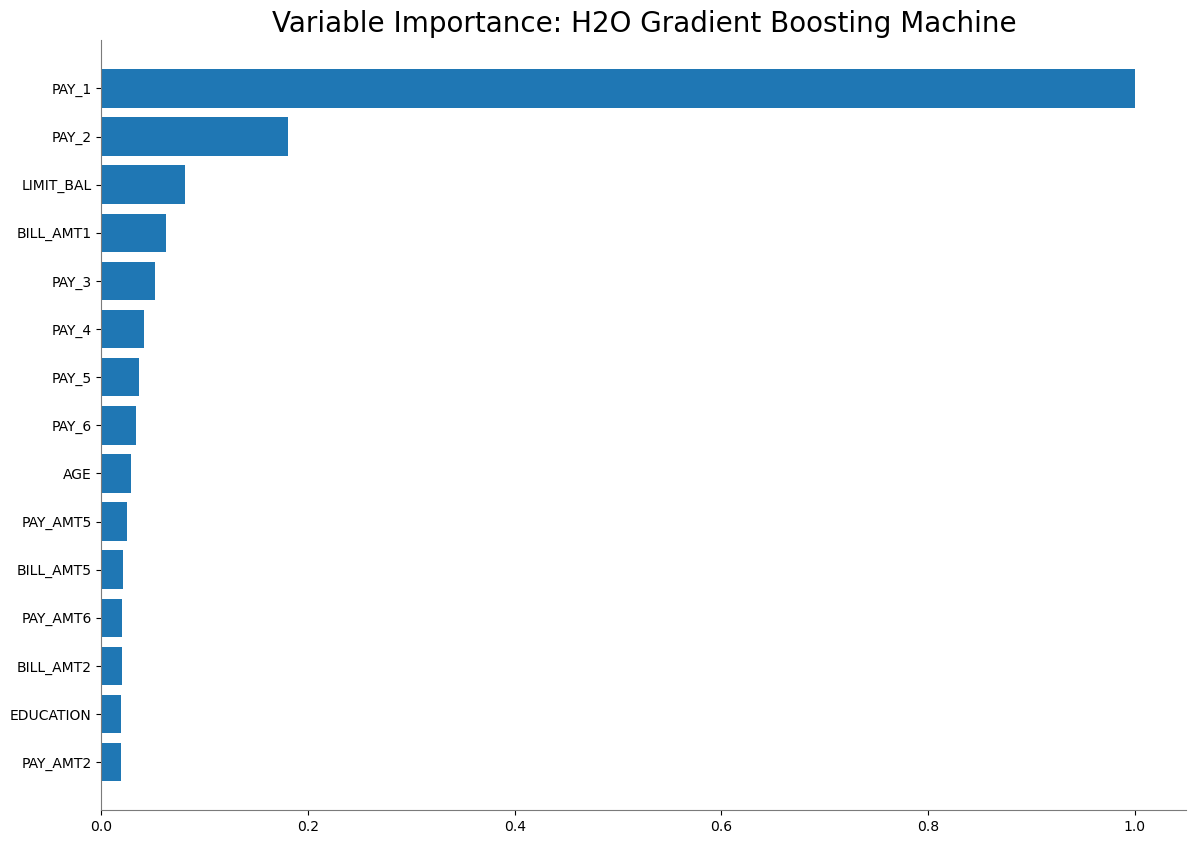

<Figure size 640x480 with 0 Axes>

In [13]:
# 変数重要度のプロット
gbm.varimp_plot(15)

## 機械学習の解釈可能性

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## default_gbm


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2723132804761315: 


,,0,1,Error,Rate
0,0,16309.0,2435.0,0.1299,(2435.0/18744.0)
1,1,2199.0,3116.0,0.4137,(2199.0/5315.0)
2,Total,18508.0,5551.0,0.1926,(4634.0/24059.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

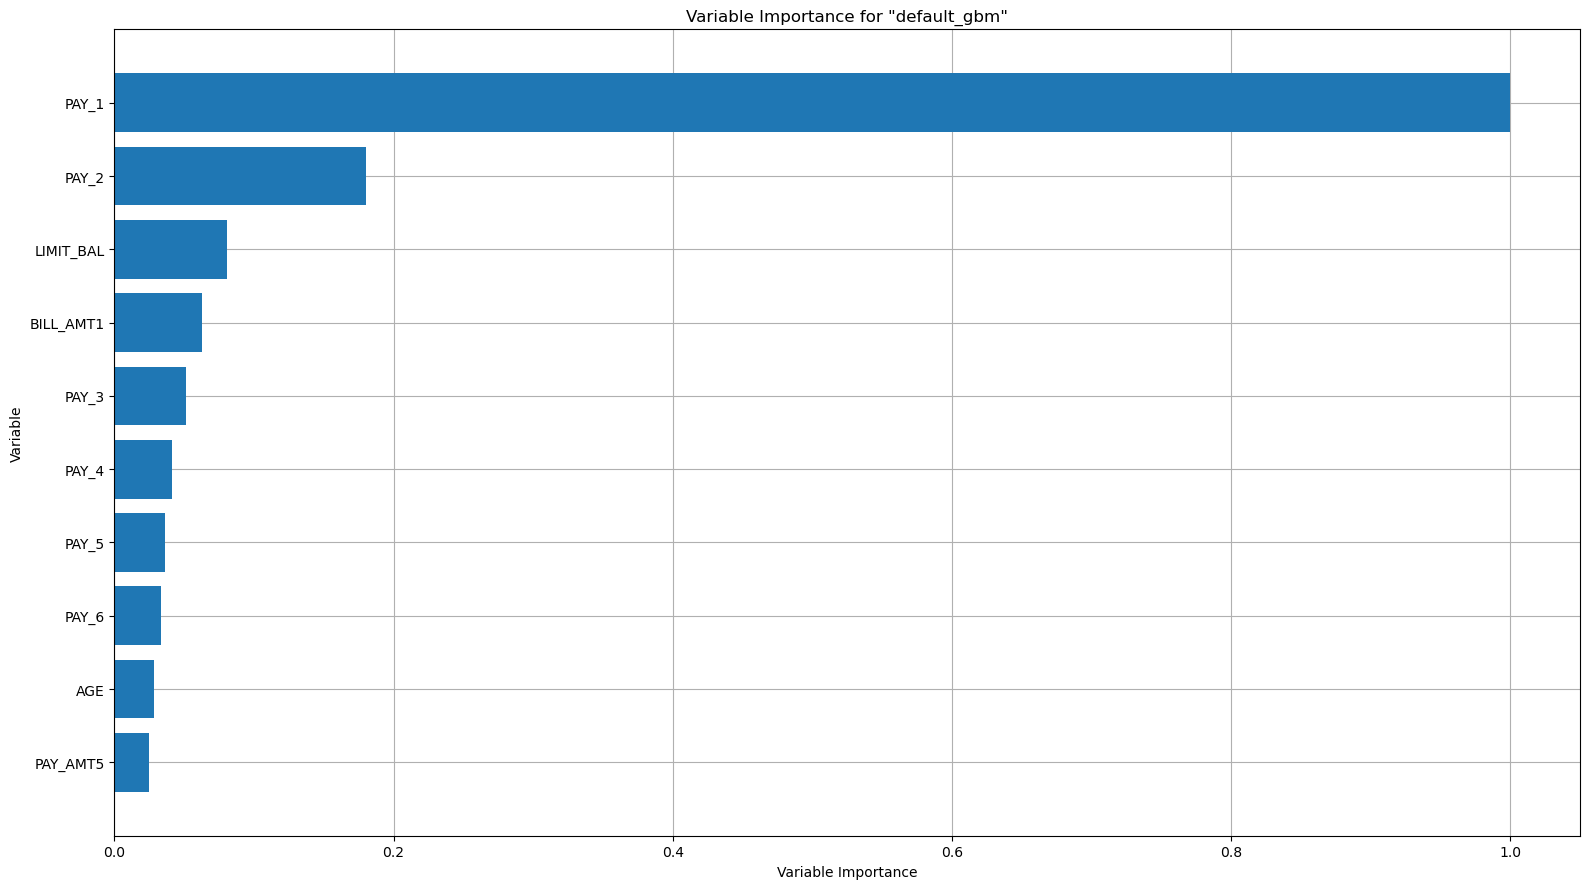

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

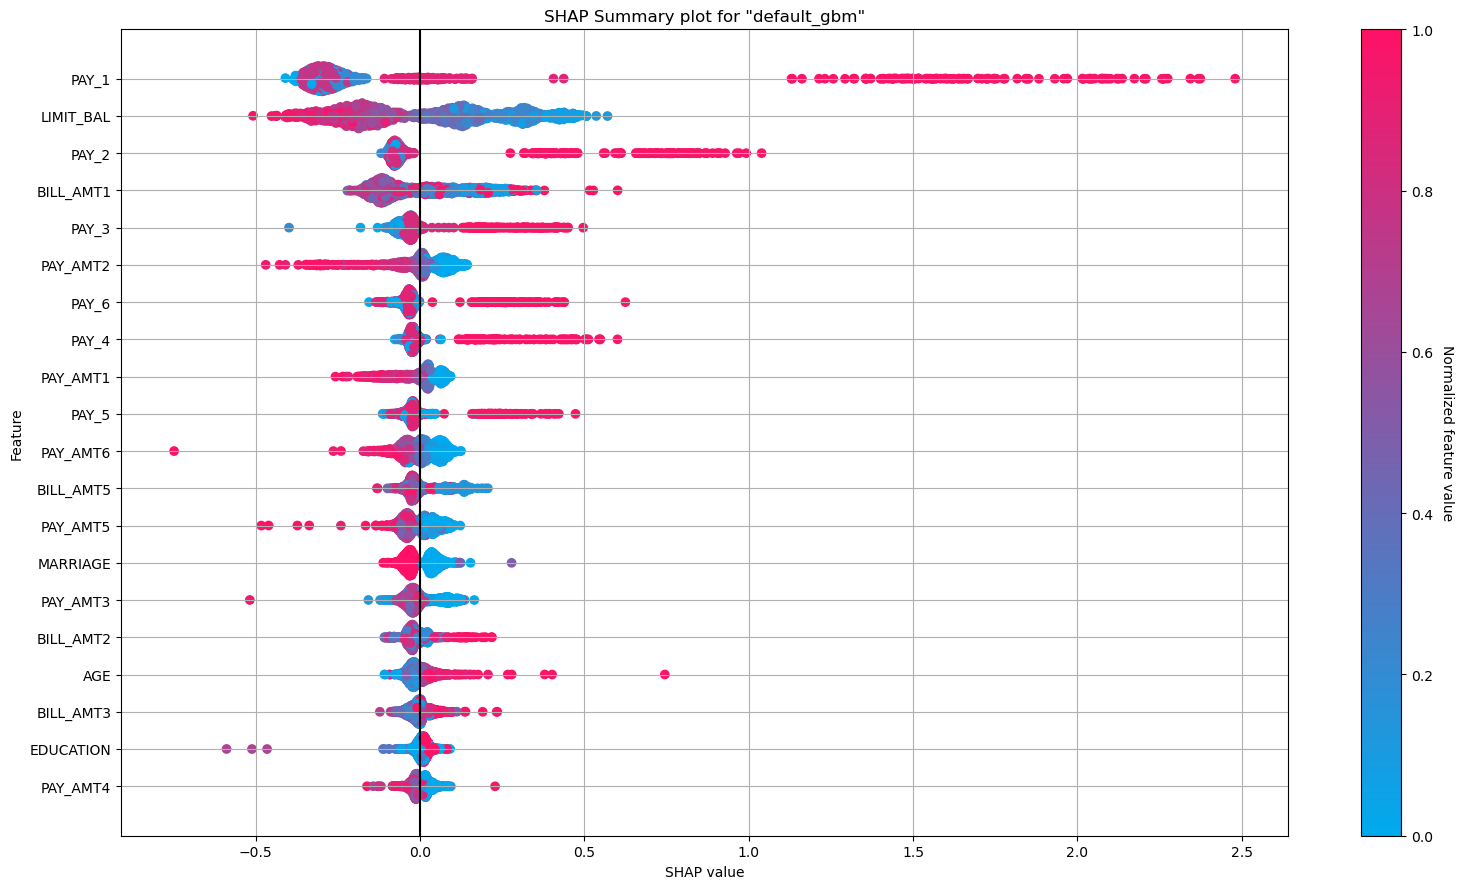

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

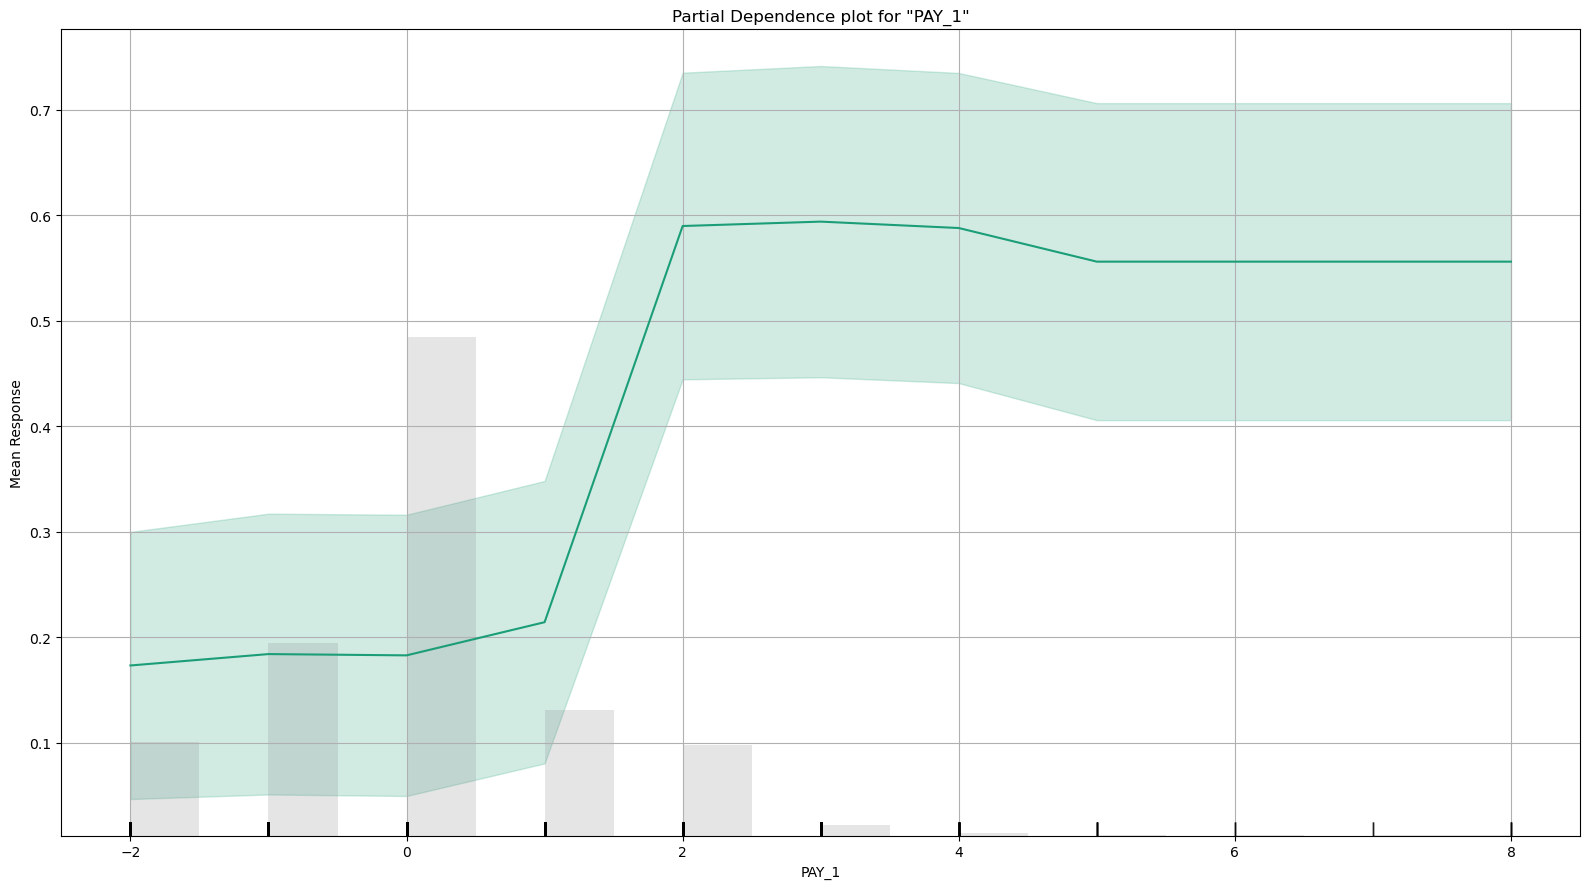

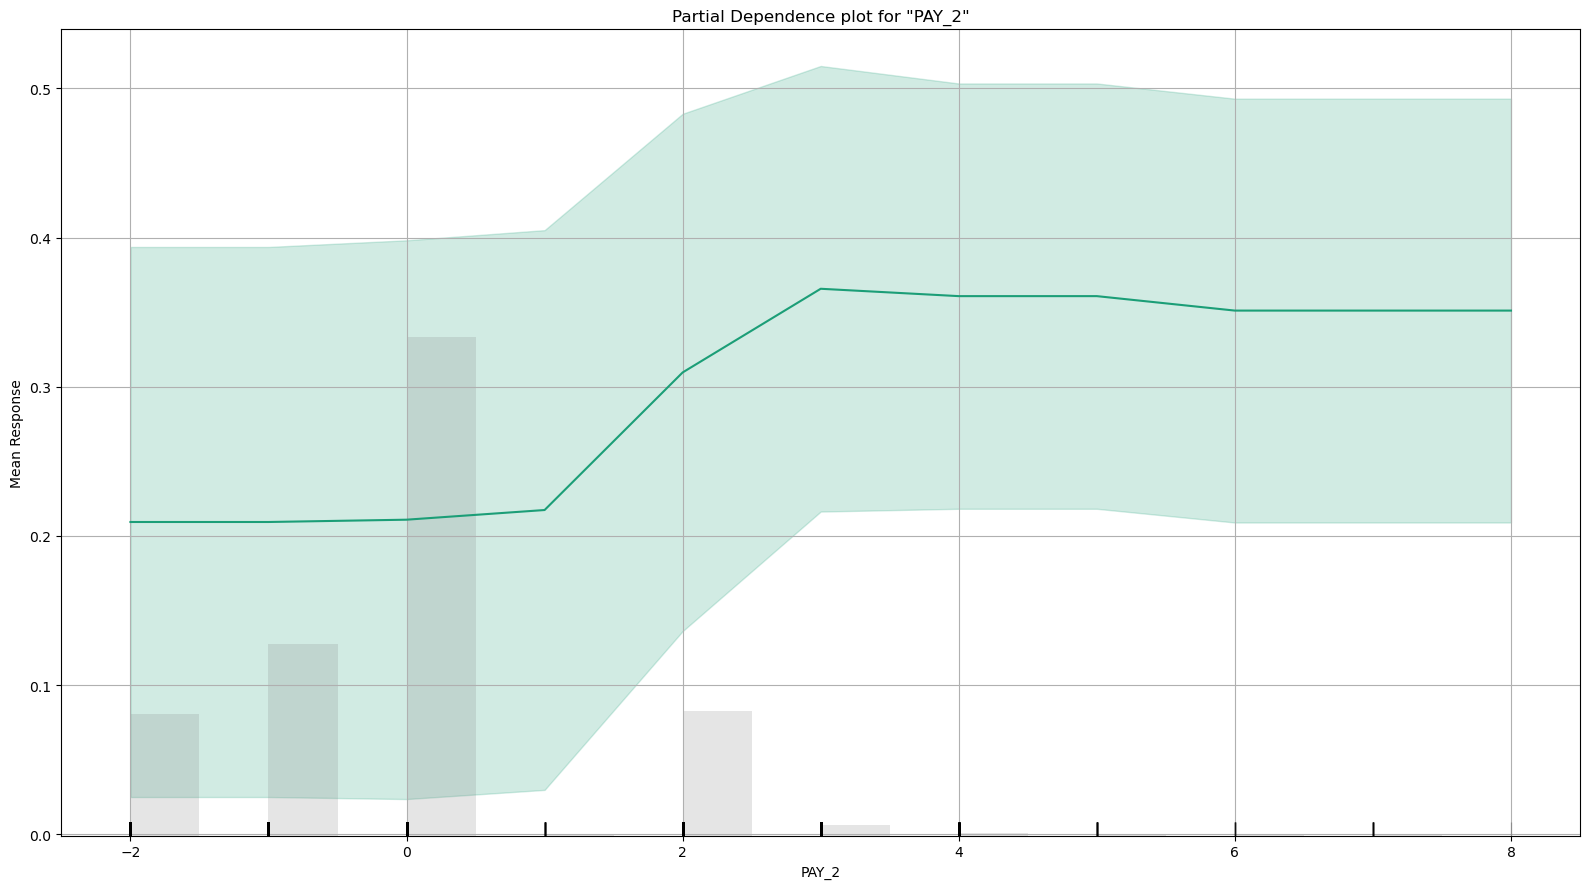

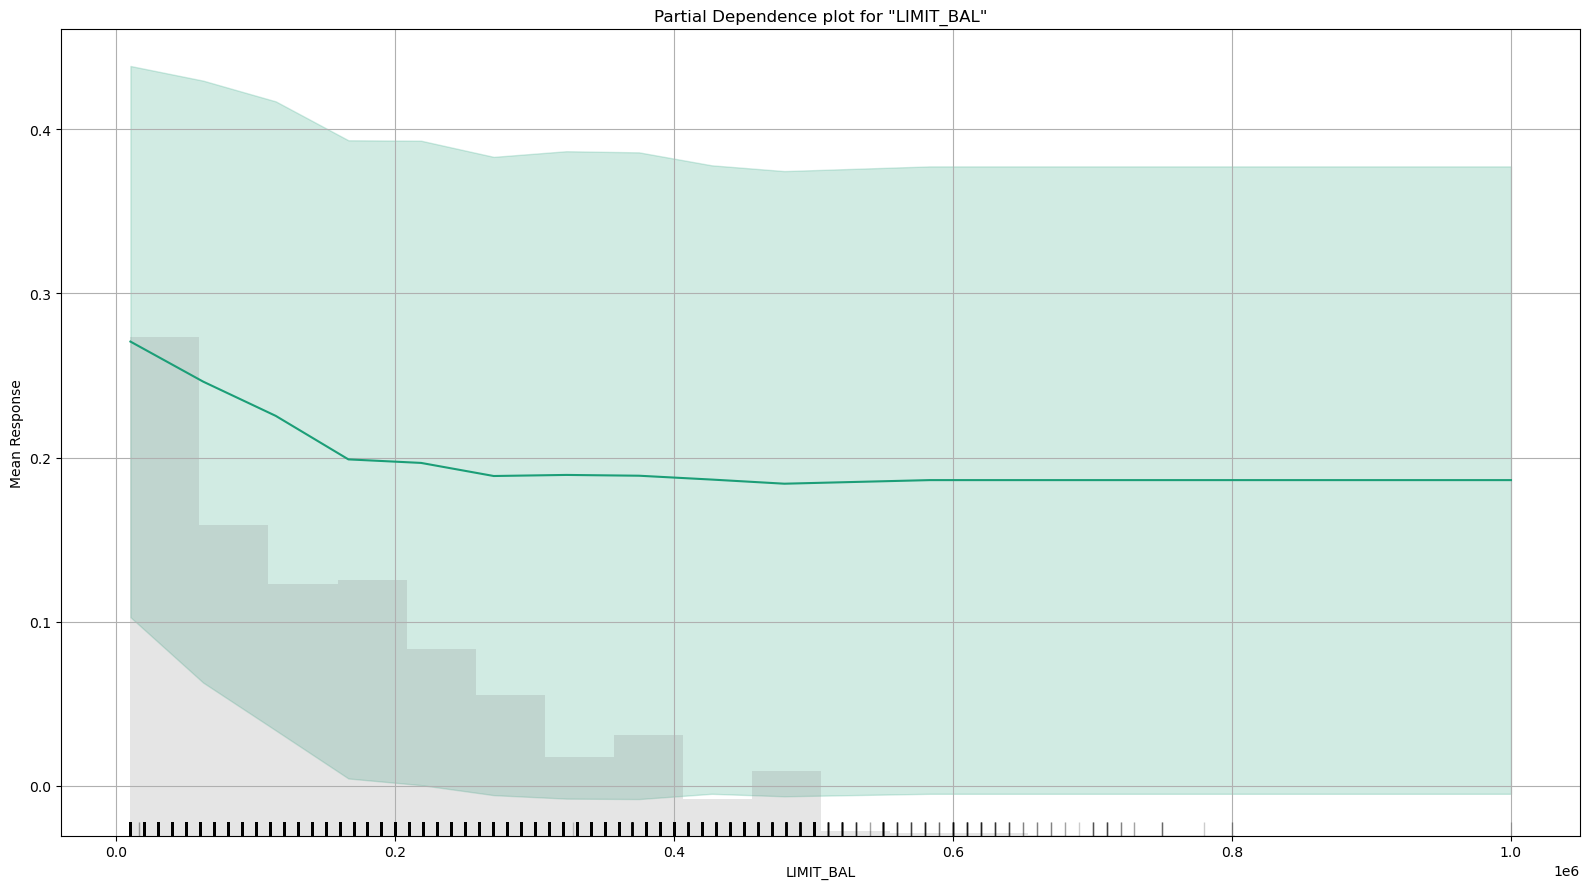

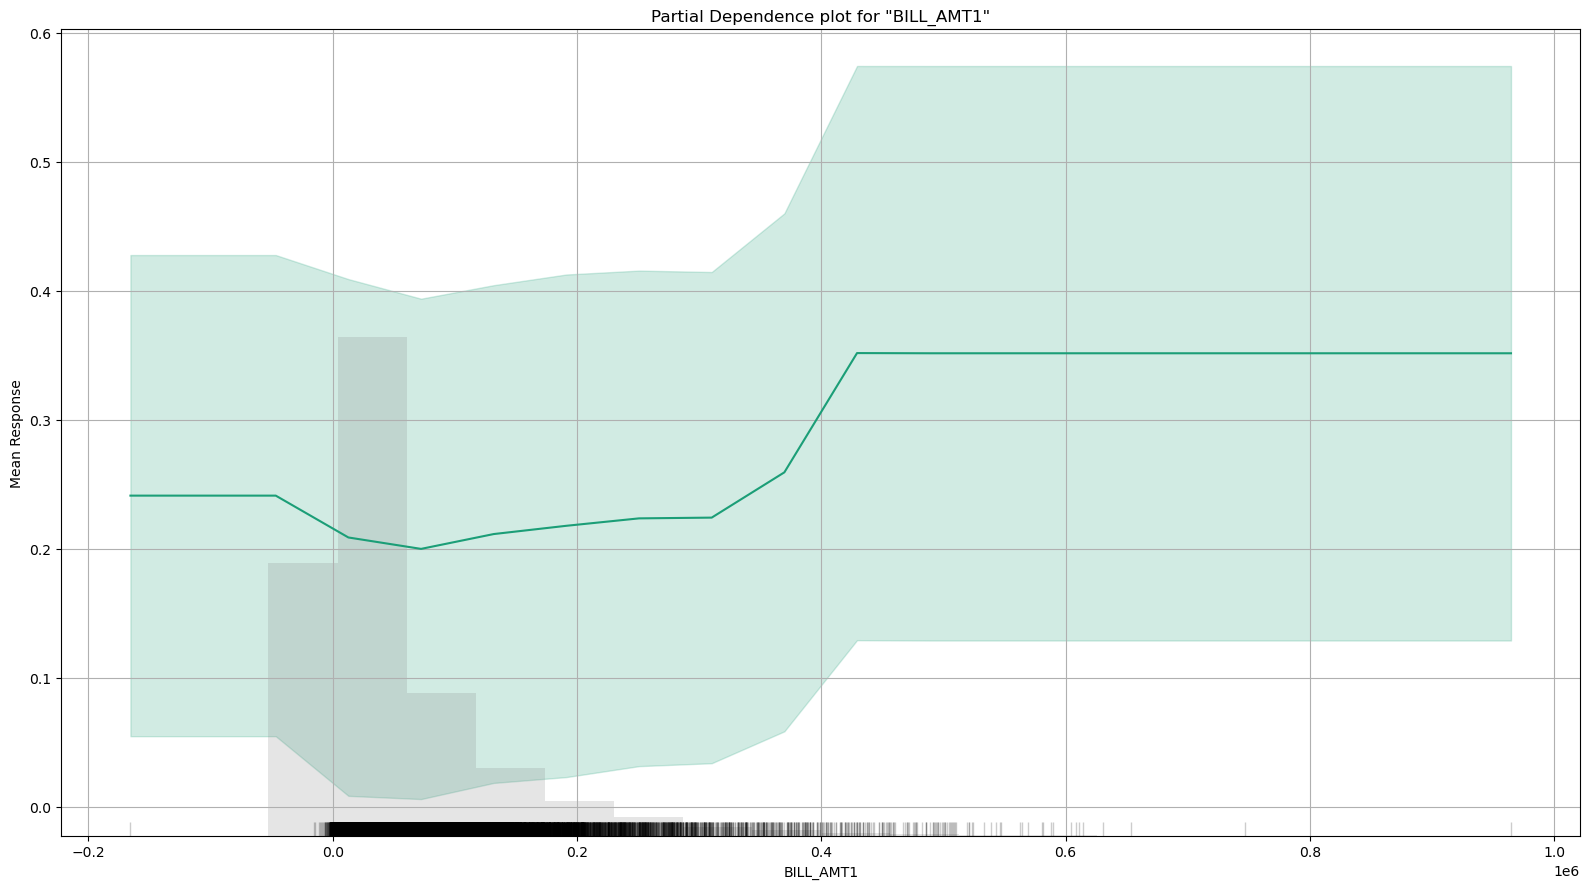

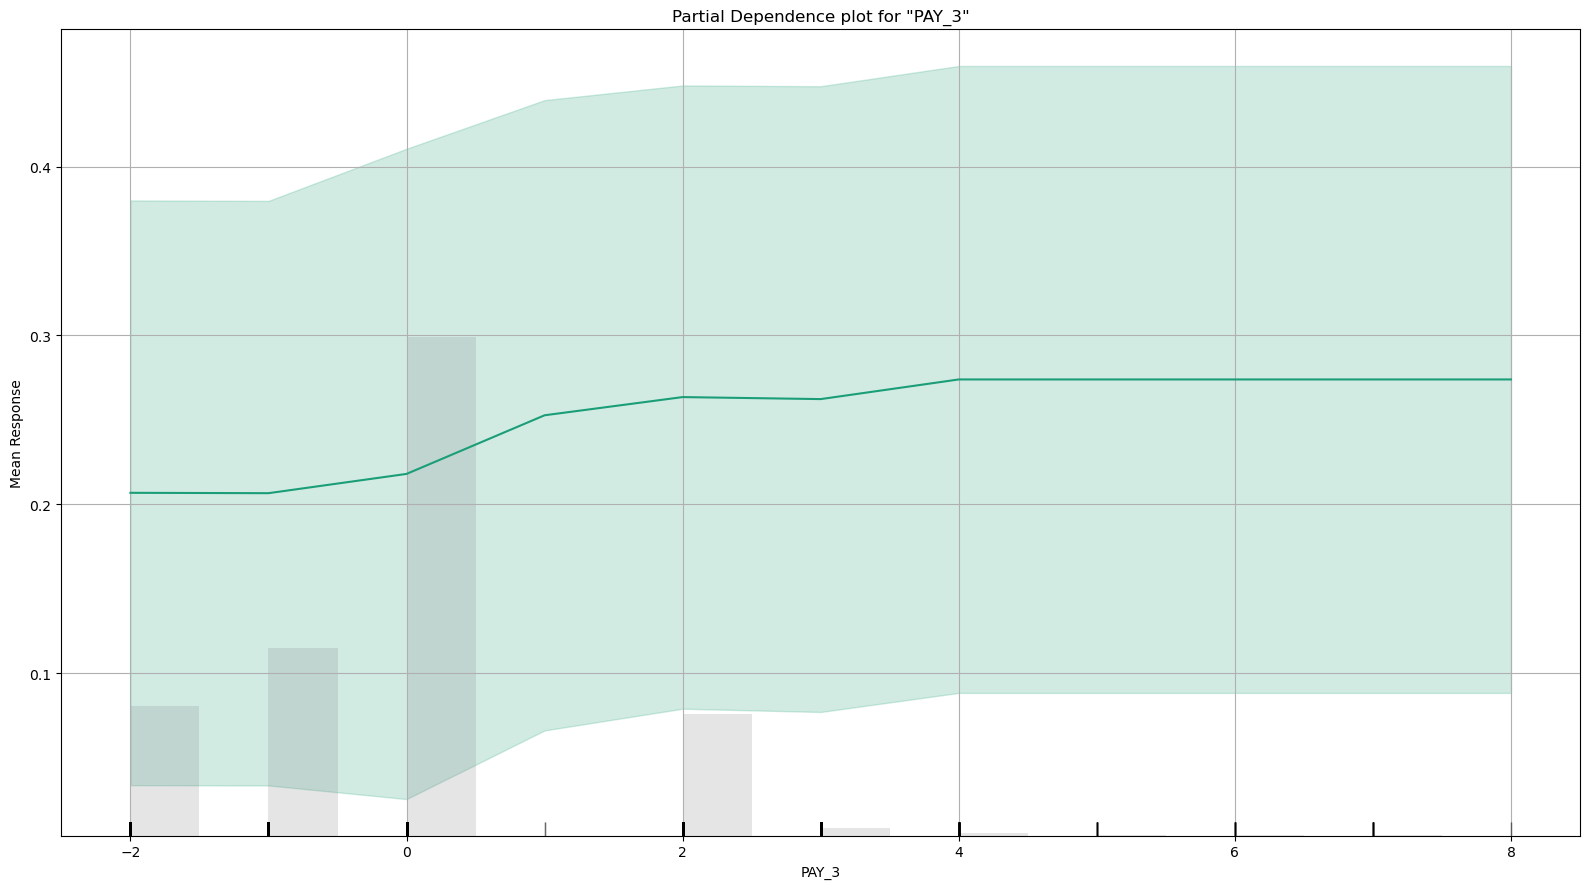

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## default_gbm


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2723132804761315: 


,,0,1,Error,Rate
0,0,16309.0,2435.0,0.1299,(2435.0/18744.0)
1,1,2199.0,3116.0,0.4137,(2199.0/5315.0)
2,Total,18508.0,5551.0,0.1926,(4634.0/24059.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

In [14]:
# モデルの解釈
gbm.explain(frame_train)

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

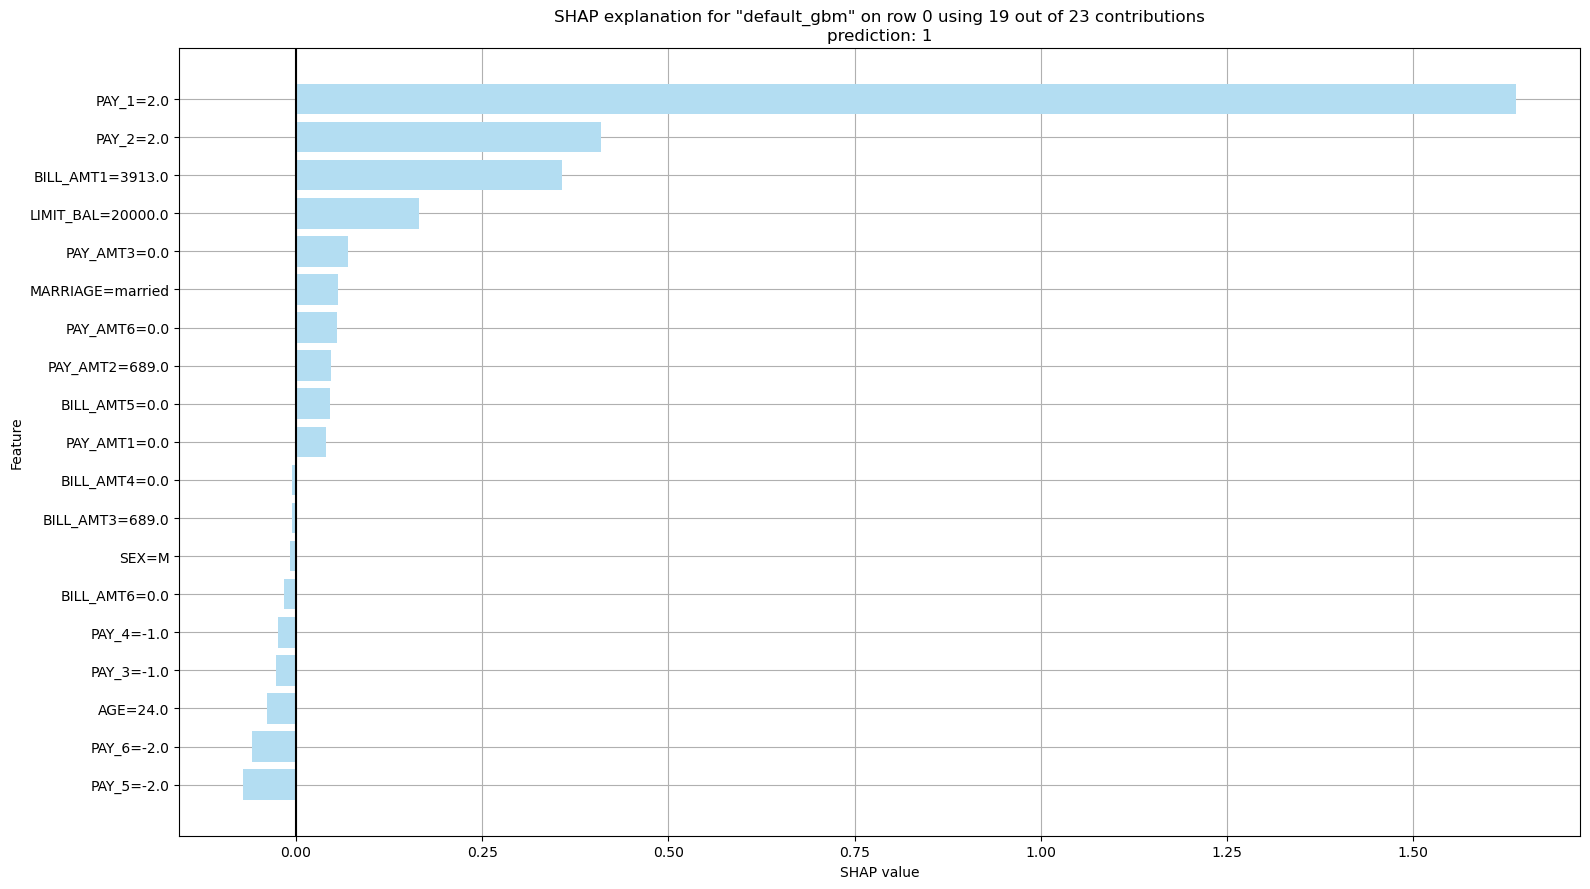

# Individual Conditional Expectation

> Individual conditional expectations (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response for a given row. ICE plot is similar to partial dependence plot (PDP), PDP shows the average effect of a feature while ICE plot shows the effect for a single instance.

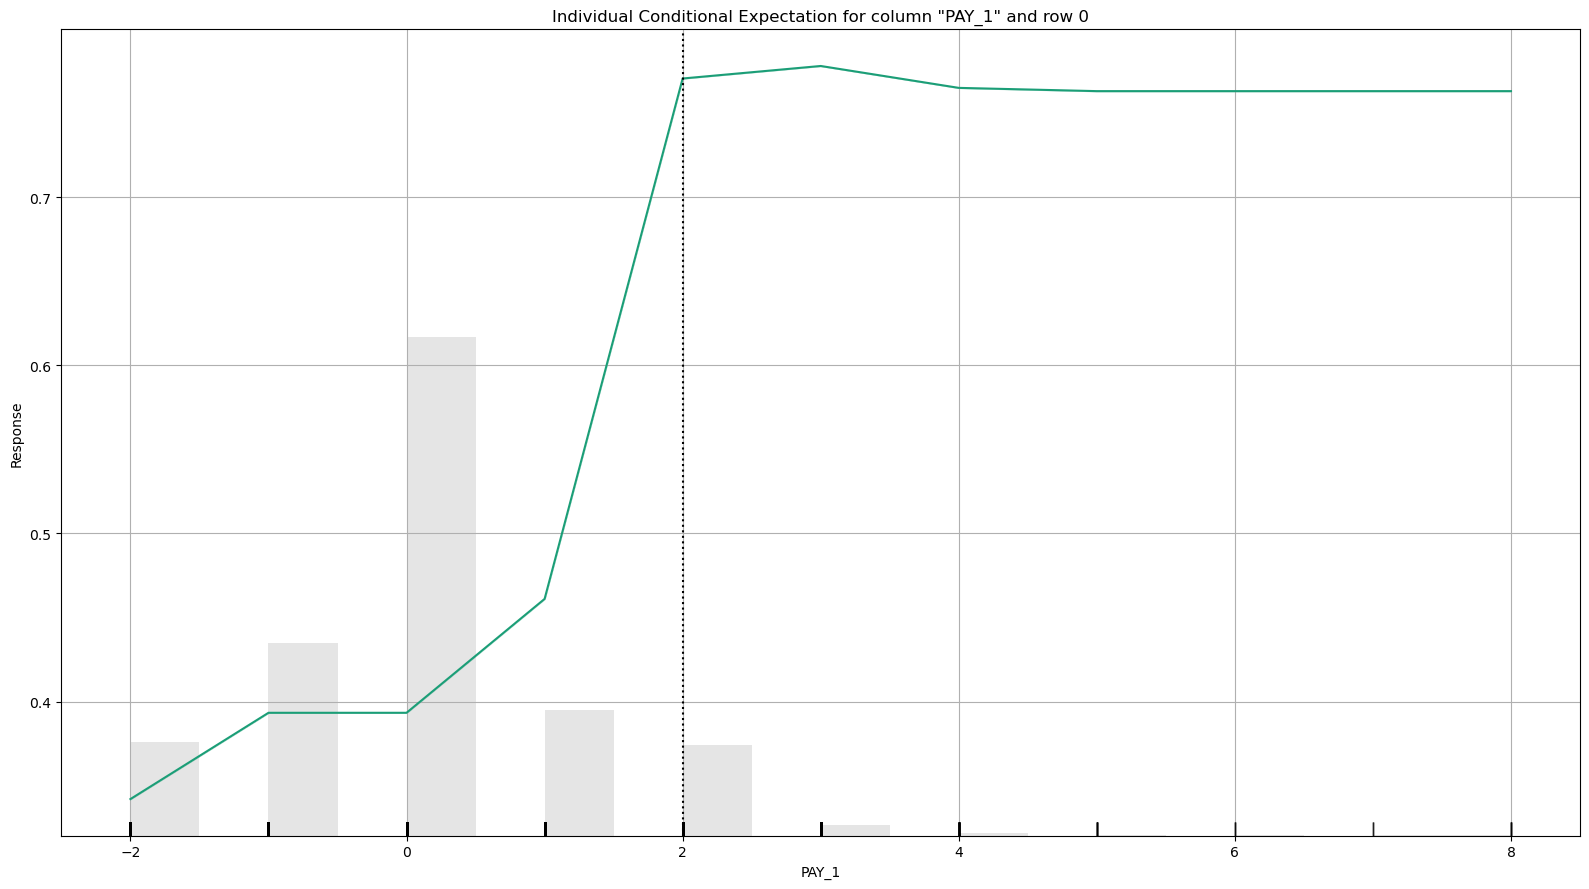

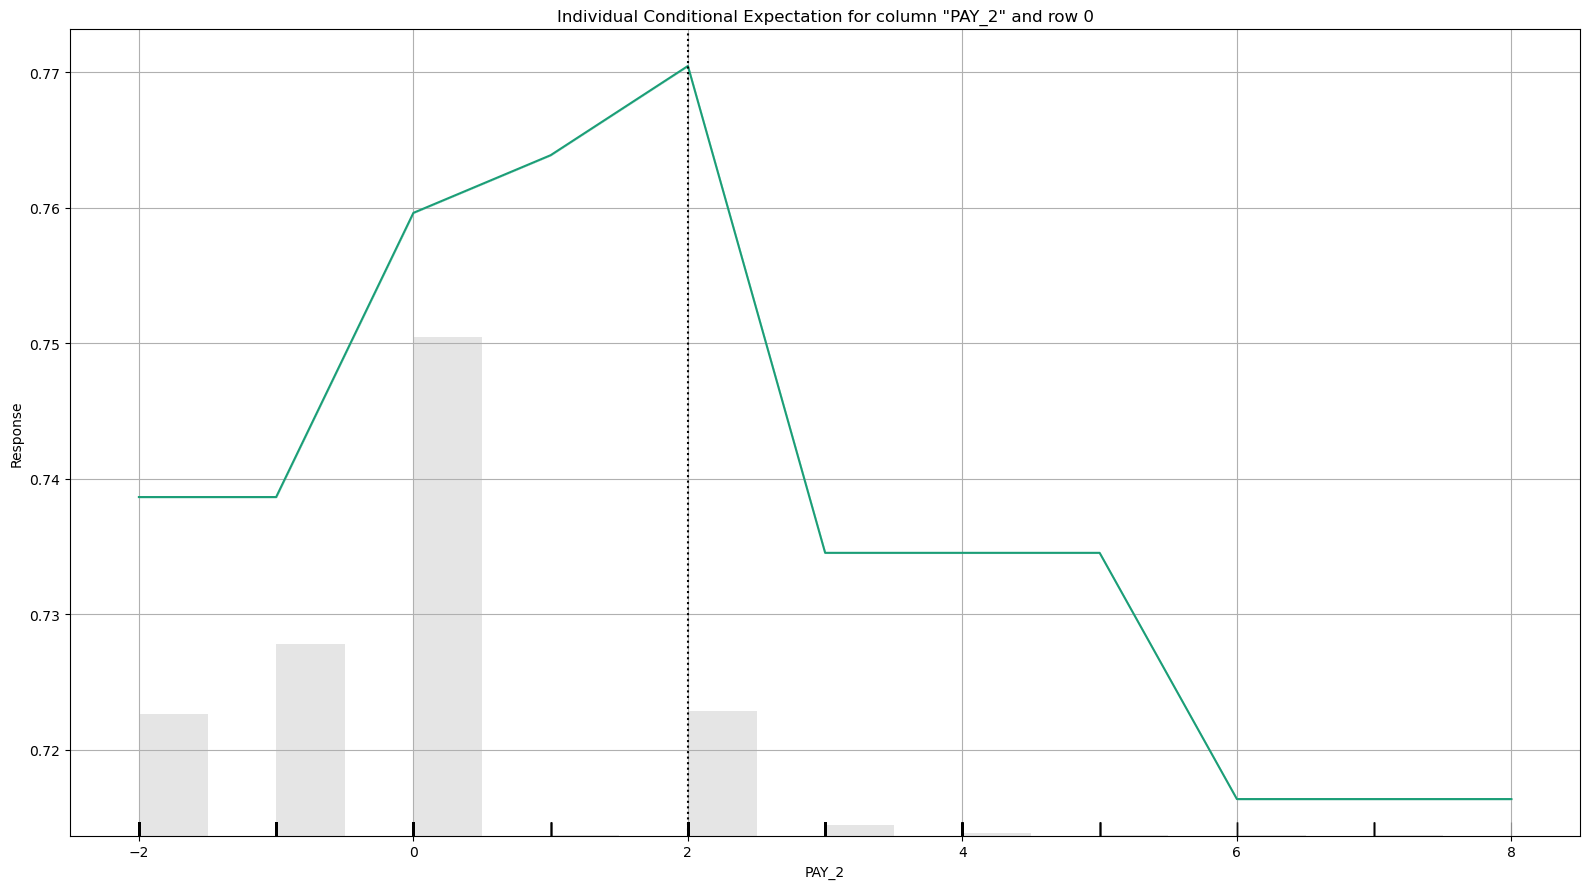

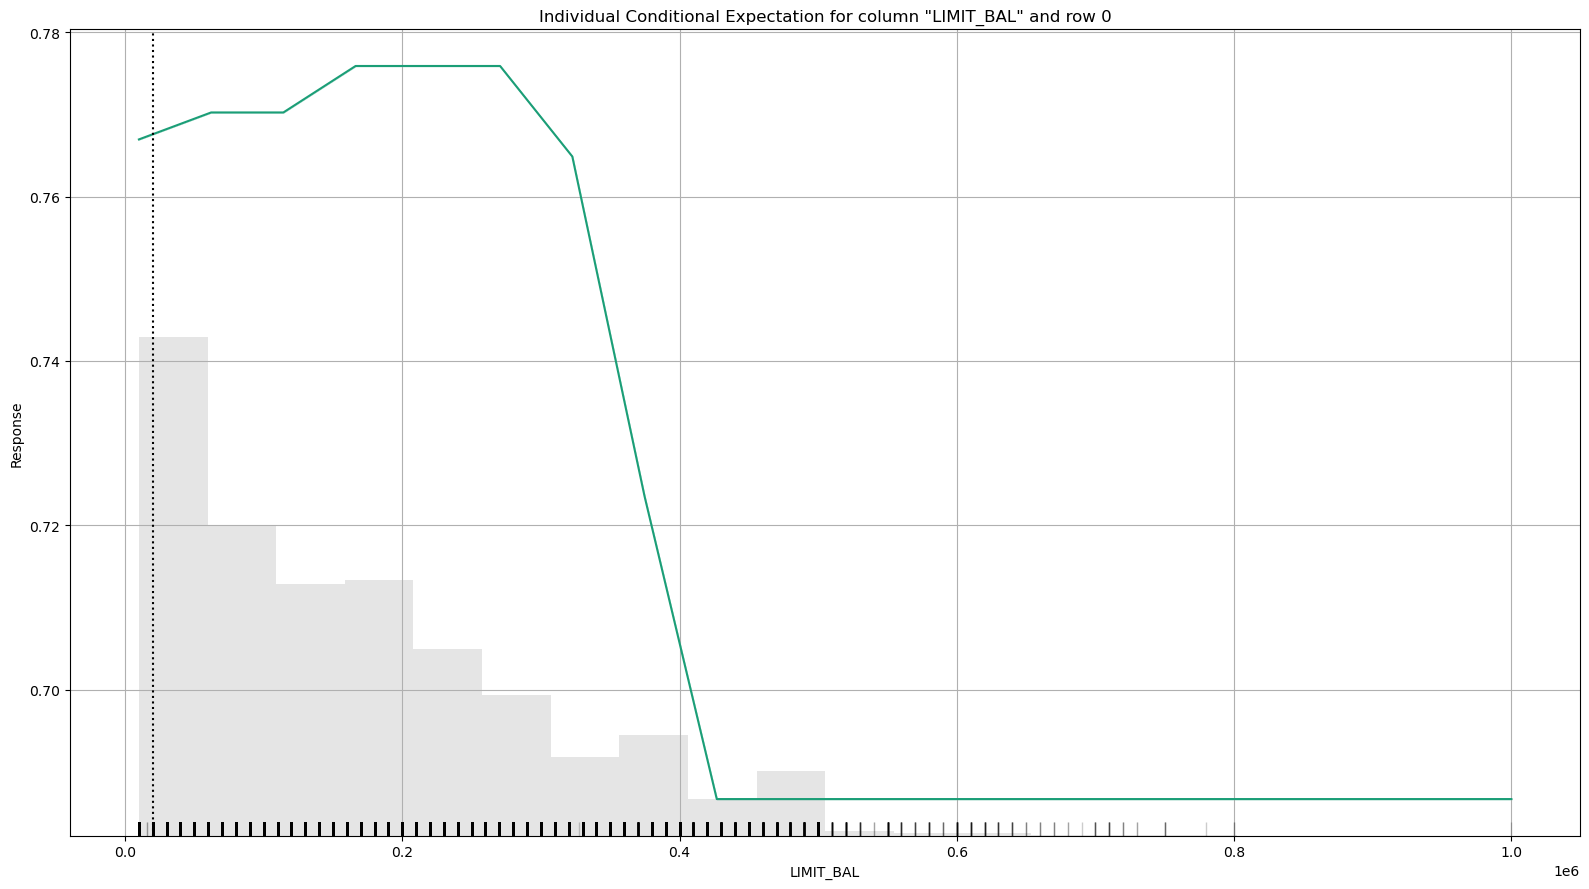

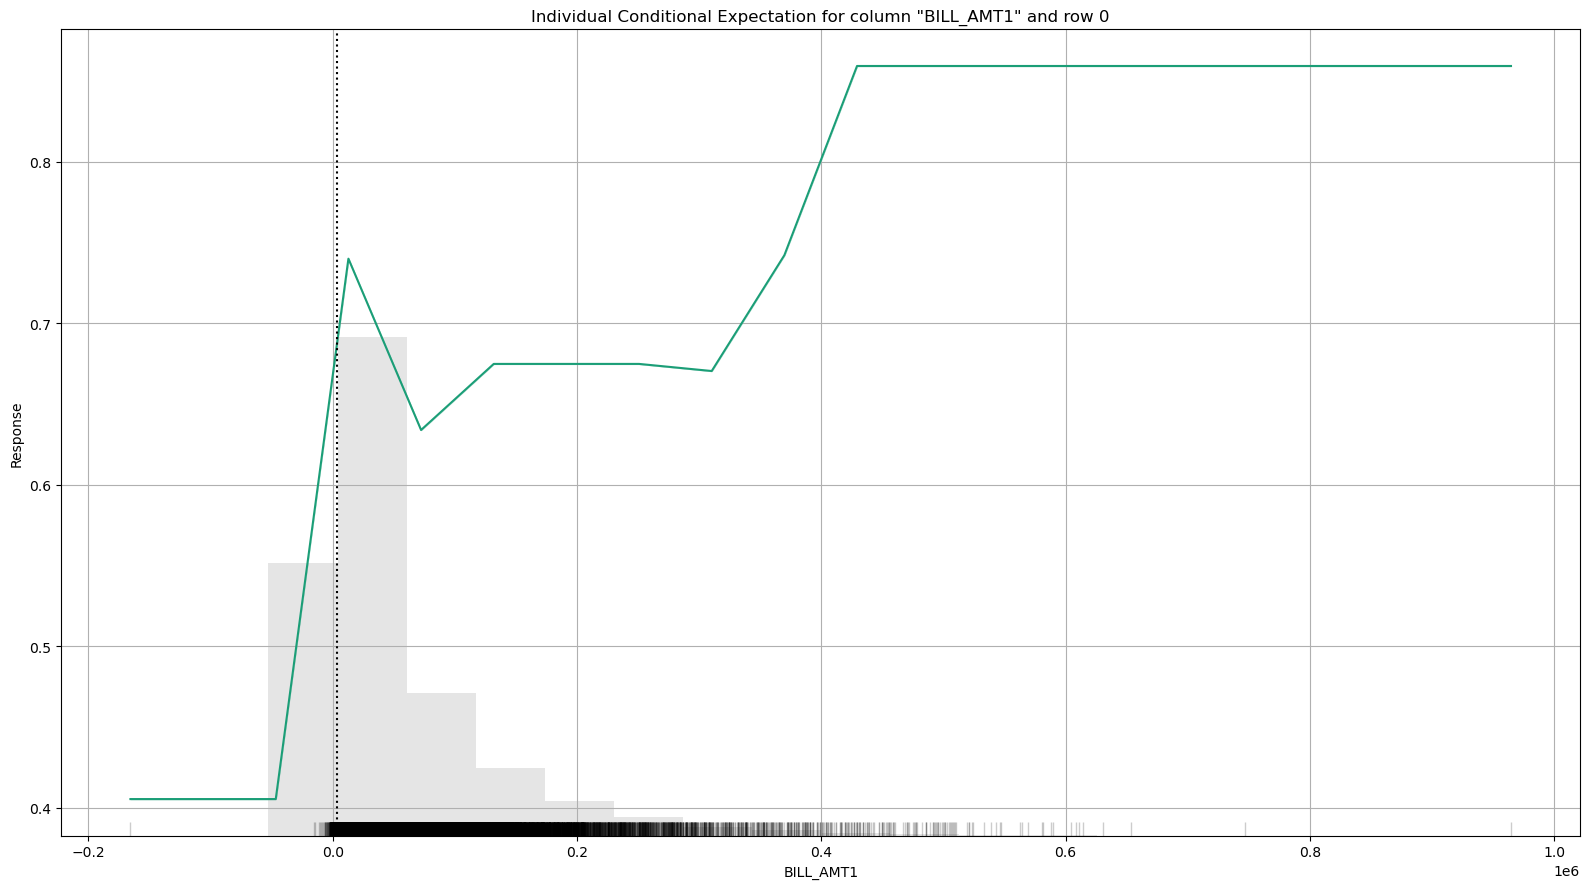

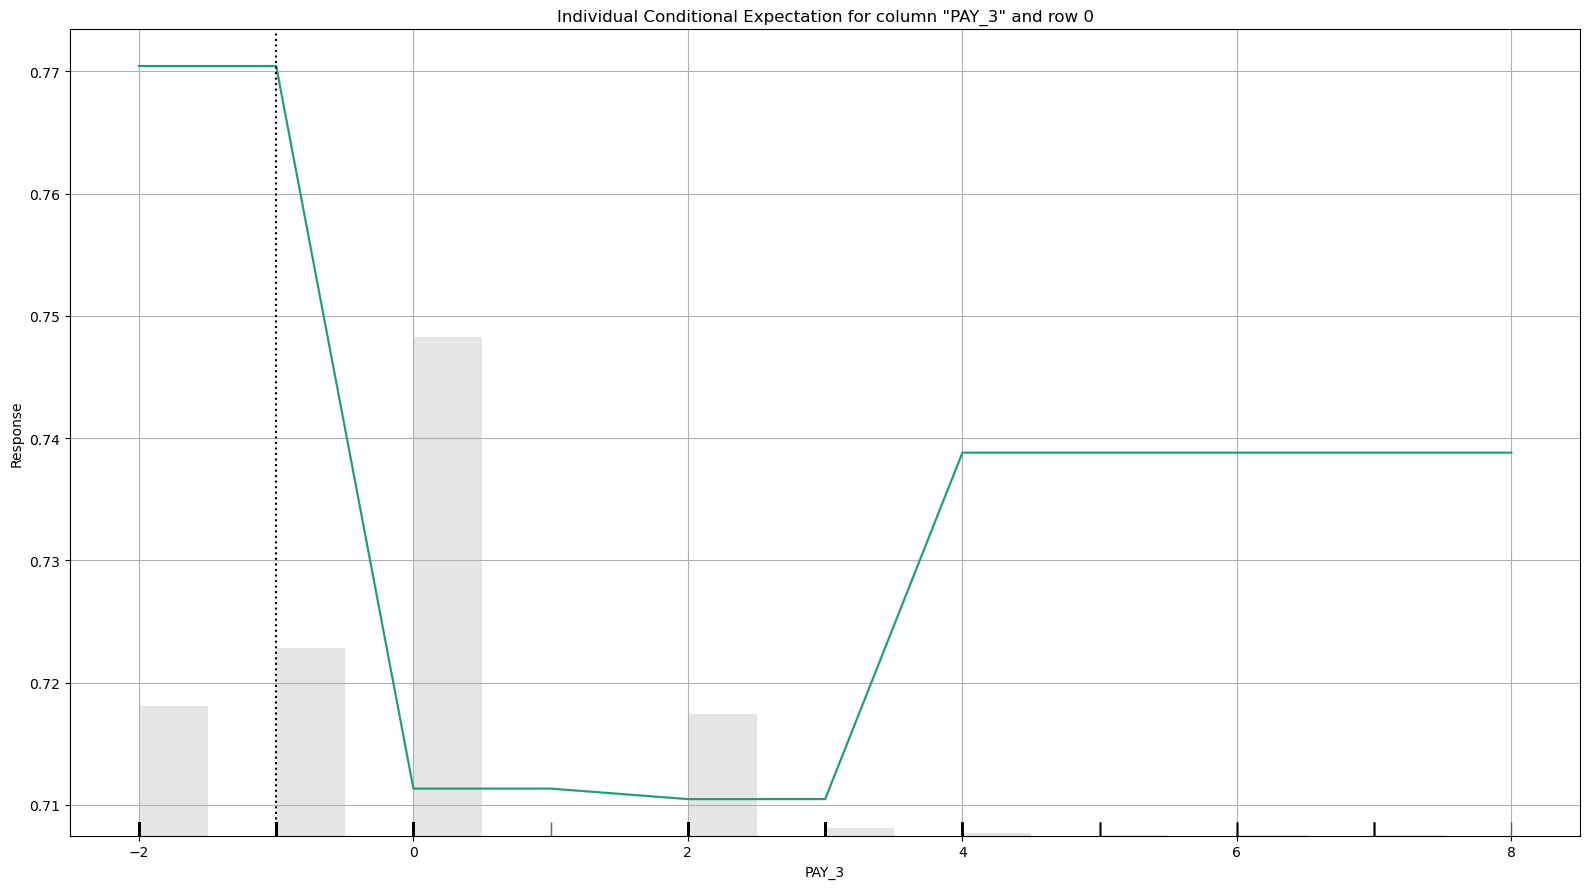

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

# Individual Conditional Expectation

> Individual conditional expectations (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response for a given row. ICE plot is similar to partial dependence plot (PDP), PDP shows the average effect of a feature while ICE plot shows the effect for a single instance.

In [15]:
# オブザベーションの説明
gbm.explain_row(frame_train, row_index=0)    # row_indexで説明を実施する行番号を指定

[**Model Explanability - ドキュメント**](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/explain.html)

## スコアリング（予測値、SHAP）

In [16]:
# 予測の実施
gbm.predict(frame_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


predict,p0,p1
0,0.846297,0.153703
0,0.857351,0.142649
1,0.56092,0.43908
1,0.598483,0.401517
1,0.758727,0.241273
1,0.374113,0.625887
0,0.796063,0.203937
0,0.779711,0.220289
0,0.794651,0.205349
0,0.840622,0.159378


In [17]:
# 予測の実施（SHAP）
gbm.predict_contributions(frame_test)

contributions progress: |████████████████████████████████████████████████████████| (done) 100%


LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,BiasTerm
0.342097,-0.0228323,0.0143341,0.0439048,0.00933288,-0.286626,-0.0760035,-0.0237435,-0.0269443,-0.0191233,-0.0281902,-0.138822,-0.0176814,0.00130009,-0.00591008,-0.0214532,-0.00597324,0.0246963,0.0116988,-0.0108093,0.0166629,0.00834613,0.016726,-1.51084
0.0540359,-0.00831344,0.00952053,-0.0369958,-0.0273015,-0.306115,-0.0654758,-0.0551063,-0.00501874,-0.00891301,-0.020301,-0.111706,0.0169188,-0.013357,-0.027254,0.100127,-0.0137745,0.0655492,0.0921188,0.0999777,0.00463122,-0.0407376,0.0148726,-1.51084
0.287993,0.0195782,0.0216082,-0.0695733,-0.0184812,-0.227082,-0.0639506,0.367053,0.444577,0.21696,0.19239,-0.0809755,-0.0205925,-0.0329755,-0.000286902,-0.00192738,0.00161077,0.0442837,0.0780881,-0.0236557,0.0910546,0.0110906,0.0291564,-1.51084
-0.0724926,-0.017982,0.0132114,0.0264593,0.125413,0.177519,-0.0561816,-0.0369371,-0.0356144,0.0293496,-0.0247051,0.236098,0.0283458,-0.00960534,-0.0173375,0.151289,0.0465384,0.0785817,0.134446,0.130266,0.0198696,0.104354,0.0808042,-1.51084
0.0281211,-0.0207577,0.0123272,0.0311214,0.0014245,-0.214104,-0.07173,-0.0689629,-0.0312247,-0.0177151,-0.0173558,0.242916,0.0192688,-0.00088282,-0.0199422,0.102803,0.00109902,0.061301,0.0975335,0.0794757,0.0267861,0.0562971,0.0673288,-1.51084
0.158542,0.00615006,0.0253956,-0.0438193,-0.0164436,2.1083,-0.0342073,0.00914529,-0.0127742,-0.0490612,-0.0578058,-0.0705429,-0.0221883,-0.0252743,-0.000537356,-0.0181789,-0.0280161,0.0226942,0.0494797,-0.0106584,0.00849088,0.000470963,0.0262943,-1.51084
0.395082,-0.00598389,-0.000133028,-0.0622503,-0.0132423,-0.266158,-0.0603417,-0.026143,0.375269,-0.0447144,-0.0312833,-0.0794324,-0.0337535,-0.0157116,0.00711555,-0.013743,0.00671999,0.0283894,-0.0580688,0.0678808,-0.00575933,-0.0747072,0.0599419,-1.51084
-0.0854883,0.018349,0.00740693,-0.0320169,-0.035806,-0.263568,-0.0685723,-0.0651642,-0.0193572,-0.033717,-0.0318569,0.273948,0.0228576,0.00145698,-0.0216954,0.133314,-0.00123027,0.0656388,0.10249,0.0868993,0.0375596,0.0772249,0.0781838,-1.51084
-0.223664,-0.012965,0.0202774,-0.0290013,-0.0280633,0.0431963,0.823445,-0.0574076,-0.0219859,-0.0623629,-0.108253,-0.103918,-0.0298122,0.0173723,-0.00530931,-0.0209942,0.0125509,0.0147079,0.00589816,-0.0278944,-0.00633258,-0.0466656,0.00482794,-1.51084
-0.134423,-0.0122234,0.00747969,0.0300729,-0.00650498,-0.278154,-0.0663474,-0.0687188,-0.0233347,-0.0536485,-0.0522953,0.124483,0.0211894,0.00208644,-0.014921,0.136845,-0.0198988,0.000146563,0.104017,0.112341,0.0151694,-0.0681205,0.0927363,-1.51084


In [18]:
# SHAPの合計値が予測値に一致（2値分類なので合計値のLogit変換）
import numpy as np
1 / (1 + np.exp(-1 * gbm.predict_contributions(frame_test)[0,:].sum()))      # 0行目を例に計算してみる

# gbm.predict_contributions(frame_test)[0,:].sum()    # -> ある行（index=0）の値の合計

contributions progress: |████████████████████████████████████████████████████████| (done) 100%


0.15370260479772085

## モデルの保存とロード

In [26]:
# モデルオブジェクト（mojo）をローカルにDL
save_path = gbm.download_mojo('../tmp')

In [27]:
# モデルをMOJOからロード
gbm_loaded = h2o.import_mojo(save_path, model_id='gbm_imported')

generic Model Build progress: |██████████████████████████████████████████████████| (done) 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  gbm_imported


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,19585.0,5.0,5.0,5.0,11.0,32.0,26.5




ModelMetricsBinomialGeneric: generic
** Reported on train data. **

MSE: 0.12551630309265596
RMSE: 0.3542828010116438
LogLoss: 0.40449893185627134
Mean Per-Class Error: 0.2718214751894015
AUC: 0.8124109103436148
AUCPR: 0.6239958025789815
Gini: 0.6248218206872296

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2723132723688151: 


,,0,1,Error,Rate
0,0,16309.0,2435.0,0.1299,(2435.0/18744.0)
1,1,2199.0,3116.0,0.4137,(2199.0/5315.0)
2,Total,18508.0,5551.0,0.1926,(4634.0/24059.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.272313,0.573532,215.0
1,max f2,0.132741,0.662595,311.0
2,max f0point5,0.512236,0.620414,126.0
3,max accuracy,0.512236,0.833035,126.0
4,max precision,0.933536,1.000000,0.0
5,max recall,0.040301,1.000000,396.0
6,max specificity,0.933536,1.000000,0.0
7,max absolute_mcc,0.334756,0.459867,186.0
8,max min_per_class_accuracy,0.184385,0.727563,268.0
9,max mean_per_class_accuracy,0.210209,0.736142,249.0



Gains/Lift Table: Avg response rate: 22.09 %, avg score: 22.10 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010017,0.795870,4.376361,4.376361,0.966805,0.823997,0.966805,0.823997,0.043838,0.043838,337.636143,337.636143,0.043411
1,2,0.020034,0.769838,4.019491,4.197926,0.887967,0.782011,0.927386,0.803004,0.040263,0.084102,301.949075,319.792609,0.082234
2,3,0.030010,0.747903,3.866490,4.087754,0.854167,0.759740,0.903047,0.788623,0.038570,0.122672,286.649028,308.775352,0.118937
3,4,0.040027,0.724236,3.662620,3.981360,0.809129,0.735396,0.879543,0.775302,0.036689,0.159360,266.262008,298.135980,0.153172
4,5,0.050002,0.704093,3.470411,3.879425,0.766667,0.714752,0.857024,0.763222,0.034619,0.193979,247.041079,287.942483,0.184803
5,6,0.100004,0.591458,2.995172,3.437298,0.661679,0.654338,0.759352,0.708780,0.149765,0.343744,199.517184,243.729833,0.312854
6,7,0.150006,0.404453,2.216277,3.030291,0.489609,0.490773,0.669438,0.636111,0.110818,0.454563,121.627665,203.029111,0.390916
7,8,0.200008,0.306979,1.776032,2.716726,0.392352,0.348379,0.600166,0.564178,0.088805,0.543368,77.603154,171.672622,0.440722
8,9,0.300012,0.215678,1.232310,2.221921,0.272236,0.254371,0.490856,0.460909,0.123236,0.666604,23.231002,122.192082,0.470541
9,10,0.400017,0.172798,0.831574,1.874334,0.183707,0.193194,0.414069,0.393980,0.083161,0.749765,-16.842591,87.433414,0.448922




ModelMetricsBinomialGeneric: generic
** Reported on validation data. **

MSE: 0.13404638635704336
RMSE: 0.36612345780766814
LogLoss: 0.4276225310210463
Mean Per-Class Error: 0.285621298963464
AUC: 0.7824598313621781
AUCPR: 0.5697571365376076
Gini: 0.5649196627243562

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.22375482407188: 


,,0,1,Error,Rate
0,0,3775.0,845.0,0.1829,(845.0/4620.0)
1,1,513.0,808.0,0.3883,(513.0/1321.0)
2,Total,4288.0,1653.0,0.2286,(1358.0/5941.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.223755,0.543376,230.0
1,max f2,0.120772,0.641399,318.0
2,max f0point5,0.414313,0.585644,141.0
3,max accuracy,0.611749,0.821074,83.0
4,max precision,0.873597,1.000000,0.0
5,max recall,0.045544,1.000000,393.0
6,max specificity,0.873597,1.000000,0.0
7,max absolute_mcc,0.352700,0.427969,163.0
8,max min_per_class_accuracy,0.175689,0.706710,265.0
9,max mean_per_class_accuracy,0.215439,0.714860,236.0



Gains/Lift Table: Avg response rate: 22.24 %, avg score: 21.71 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010099,0.795799,4.047615,4.047615,0.900000,0.822001,0.900000,0.822001,0.040878,0.040878,304.761544,304.761544,0.039579
1,2,0.020030,0.769332,3.506409,3.779286,0.779661,0.782636,0.840336,0.802484,0.034822,0.075700,250.640886,277.928613,0.071588
2,3,0.030130,0.742582,3.373013,3.643105,0.750000,0.756072,0.810056,0.786927,0.034065,0.109765,237.301287,264.310515,0.102406
3,4,0.040061,0.718583,3.887540,3.703700,0.864407,0.730671,0.823529,0.772981,0.038607,0.148372,288.754026,270.370041,0.139282
4,5,0.050160,0.697907,2.773366,3.516385,0.616667,0.707523,0.781879,0.759802,0.028009,0.176382,177.336614,251.638478,0.162312
5,6,0.100151,0.583198,2.831665,3.174600,0.629630,0.648109,0.705882,0.704049,0.141559,0.317941,183.166512,217.460035,0.280062
6,7,0.150143,0.383116,2.271389,2.873867,0.505051,0.469925,0.639013,0.626095,0.113550,0.431491,127.138914,187.386747,0.361794
7,8,0.200135,0.296654,1.589972,2.553164,0.353535,0.333112,0.567704,0.552911,0.079485,0.510977,58.997240,155.316365,0.399721
8,9,0.300118,0.211081,1.211408,2.106162,0.269360,0.245753,0.468312,0.450583,0.121120,0.632097,21.140754,110.616246,0.426902
9,10,0.400101,0.169953,0.832843,1.787966,0.185185,0.189273,0.397560,0.385283,0.083270,0.715367,-16.715732,78.796643,0.405410




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2022-09-29 08:25:01,0.031 sec,0.0,0.414863,0.528064,0.500000,0.220915,1.000000,0.779085,0.415830,0.529876,0.500000,0.222353,1.000000,0.777647
1,,2022-09-29 08:25:01,0.354 sec,1.0,0.405785,0.507520,0.761292,0.544950,3.490510,0.203333,0.407171,0.510219,0.757105,0.534854,3.486318,0.232452
2,,2022-09-29 08:25:02,0.493 sec,2.0,0.398566,0.492658,0.768914,0.550314,3.491121,0.192818,0.400389,0.496218,0.757215,0.534594,3.490222,0.222016
3,,2022-09-29 08:25:02,0.573 sec,3.0,0.392547,0.480874,0.773657,0.554474,3.525839,0.212644,0.394725,0.485069,0.762263,0.541455,3.589628,0.214274
4,,2022-09-29 08:25:02,0.648 sec,4.0,0.387716,0.471783,0.774253,0.556573,3.575376,0.213392,0.390134,0.476371,0.762218,0.544431,3.663695,0.212927
5,,2022-09-29 08:25:02,0.729 sec,5.0,0.383626,0.464131,0.774974,0.559063,3.597630,0.210067,0.386241,0.469074,0.762414,0.550198,3.747792,0.210571
6,,2022-09-29 08:25:02,0.823 sec,6.0,0.380170,0.457714,0.776991,0.565015,3.762538,0.213267,0.382975,0.462918,0.766738,0.553611,3.765224,0.214442
7,,2022-09-29 08:25:02,0.944 sec,7.0,0.377326,0.452487,0.780022,0.571382,3.952595,0.212852,0.380447,0.458231,0.768804,0.551818,3.459500,0.213769
8,,2022-09-29 08:25:02,1.011 sec,8.0,0.374853,0.447935,0.781868,0.576115,4.106815,0.203458,0.378204,0.454054,0.770601,0.559613,3.795929,0.201481
9,,2022-09-29 08:25:02,1.073 sec,9.0,0.372772,0.444006,0.782843,0.578445,3.879962,0.201089,0.376457,0.450708,0.771077,0.558695,3.763089,0.200976



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,PAY_1,3327.840088,1.000000,0.575843
1,PAY_2,599.975403,0.180290,0.103819
2,LIMIT_BAL,269.505493,0.080985,0.046635
3,BILL_AMT1,209.255768,0.062880,0.036209
4,PAY_3,171.170013,0.051436,0.029619
5,PAY_4,136.879822,0.041132,0.023685
6,PAY_5,121.079727,0.036384,0.020951
7,PAY_6,111.450684,0.033490,0.019285
8,AGE,94.469177,0.028388,0.016347
9,PAY_AMT5,81.950554,0.024626,0.014181



See the whole table with table.as_data_frame()



## ハイパーパラメータチューニング（グリッドサーチ）

In [19]:
# グリッドサーチ（ランダムサーチも実施可能）

moder_search = H2OGradientBoostingEstimator(seed=12345, model_id='search_gbm')    # モデル
params_search = {'ntrees':[40,60], 'max_depth':[4,6]}   # モデルに対応した探索するハイパーパラメータのリスト

hsearch = h2o.grid.H2OGridSearch(
    model=moder_search,
    hyper_params=params_search,
    search_criteria={'strategy':'Cartesian'},    #  グリッドサーチ。ランダムサーチの場合は'RandomDiscrete'とモデル数（max_models）や時間（max_runtime_secs）を指定
    )
hsearch


Grid Search of Model H2OGradientBoostingEstimator: 


,Model,"Hyperparameters: [ntrees, max_depth]"
0,1,"[40, 4]"
1,2,"[40, 6]"
2,3,"[60, 4]"
3,4,"[60, 6]"


[**Gred Search - ドキュメント**](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/grid-search.html#grid-hyperparameter-search)  
[**H2OGridSearch - Python API Reference**](https://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/modeling.html#h2ogridsearch)

In [20]:
# 学習の実施
%time hsearch.train(x=X_cols, y=y_col, training_frame=frame_train, validation_frame=frame_test)

# デフォルトでvalidation_frameに指定したデータにおけるloglossの順序でモデルが表示

gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
CPU times: user 169 ms, sys: 14.7 ms, total: 183 ms
Wall time: 8.38 s
     max_depth  ntrees  \
0          4.0    60.0   
1          6.0    40.0   
2          6.0    60.0   
3          4.0    40.0   

                                                       model_ids   logloss  
0  Grid_GBM_py_4_sid_bef9_model_python_1664437463314_104_model_3  0.427481  
1  Grid_GBM_py_4_sid_bef9_model_python_1664437463314_104_model_2  0.427728  
2  Grid_GBM_py_4_sid_bef9_model_python_1664437463314_104_model_4  0.428110  
3  Grid_GBM_py_4_sid_bef9_model_python_1664437463314_104_model_1  0.429610  


In [21]:
# AUCで判断する場合
hsearch.get_grid(sort_by='auc', decreasing=True)

     max_depth  ntrees  \
0          6.0    40.0   
1          4.0    60.0   
2          6.0    60.0   
3          4.0    40.0   

                                                       model_ids       auc  
0  Grid_GBM_py_4_sid_bef9_model_python_1664437463314_104_model_2  0.784247  
1  Grid_GBM_py_4_sid_bef9_model_python_1664437463314_104_model_3  0.783159  
2  Grid_GBM_py_4_sid_bef9_model_python_1664437463314_104_model_4  0.782985  
3  Grid_GBM_py_4_sid_bef9_model_python_1664437463314_104_model_1  0.780056  


In [22]:
# AUC基準でのベストモデル
hsearch.get_grid(sort_by='auc', decreasing=True)[0]

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  Grid_GBM_py_4_sid_bef9_model_python_1664437463314_104_model_2


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,40.0,40.0,26326.0,6.0,6.0,6.0,28.0,60.0,47.7




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.12211086460252016
RMSE: 0.34944365011045797
LogLoss: 0.3956524592645053
Mean Per-Class Error: 0.2637859354880674
AUC: 0.8232686162300065
AUCPR: 0.6467032130677425
Gini: 0.6465372324600129

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.27177350806920225: 


,,0,1,Error,Rate
0,0,16314.0,2430.0,0.1296,(2430.0/18744.0)
1,1,2115.0,3200.0,0.3979,(2115.0/5315.0)
2,Total,18429.0,5630.0,0.1889,(4545.0/24059.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.271774,0.584742,218.0
1,max f2,0.143658,0.670442,304.0
2,max f0point5,0.565974,0.638022,109.0
3,max accuracy,0.516087,0.837815,125.0
4,max precision,0.929545,1.000000,0.0
5,max recall,0.046826,1.000000,394.0
6,max specificity,0.929545,1.000000,0.0
7,max absolute_mcc,0.355414,0.478513,180.0
8,max min_per_class_accuracy,0.186351,0.740169,267.0
9,max mean_per_class_accuracy,0.202941,0.742556,257.0



Gains/Lift Table: Avg response rate: 22.09 %, avg score: 22.11 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010100,0.794740,4.452110,4.452110,0.983539,0.824259,0.983539,0.824259,0.044967,0.044967,345.211046,345.211046,0.044754
1,2,0.020034,0.772898,4.109946,4.282448,0.907950,0.782894,0.946058,0.803748,0.040828,0.085795,310.994619,328.244809,0.084408
2,3,0.030010,0.751648,3.923073,4.162988,0.866667,0.763029,0.919668,0.790212,0.039135,0.124929,292.307306,316.298825,0.121835
3,4,0.040027,0.730995,3.831664,4.080071,0.846473,0.741391,0.901350,0.777994,0.038382,0.163311,283.166408,308.007119,0.158243
4,5,0.050002,0.710921,3.828768,4.029936,0.845833,0.720615,0.890274,0.766547,0.038194,0.201505,282.876842,302.993598,0.194463
5,6,0.100004,0.585051,3.096767,3.563351,0.684123,0.657217,0.787199,0.711882,0.154845,0.356350,209.676686,256.335142,0.329035
6,7,0.150006,0.402333,2.208751,3.111818,0.487947,0.486325,0.687448,0.636696,0.110442,0.466792,120.875109,211.181798,0.406613
7,8,0.200008,0.307405,1.787320,2.780693,0.394846,0.348844,0.614298,0.564733,0.089370,0.556162,78.731988,178.069345,0.457143
8,9,0.300012,0.217592,1.207852,2.256413,0.266833,0.257185,0.498476,0.462217,0.120790,0.676952,20.785196,125.641296,0.483824
9,10,0.400017,0.173079,0.874846,1.911021,0.193267,0.193146,0.422174,0.394950,0.087488,0.764440,-12.515395,91.102123,0.467759




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.13429371810027535
RMSE: 0.3664610731036454
LogLoss: 0.42772846447163065
Mean Per-Class Error: 0.29236042156178416
AUC: 0.7842467335843566
AUCPR: 0.5673728304434144
Gini: 0.5684934671687132

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2746785344838554: 


,,0,1,Error,Rate
0,0,4017.0,603.0,0.1305,(603.0/4620.0)
1,1,600.0,721.0,0.4542,(600.0/1321.0)
2,Total,4617.0,1324.0,0.2025,(1203.0/5941.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.274679,0.545180,207.0
1,max f2,0.135087,0.647771,306.0
2,max f0point5,0.479822,0.583915,130.0
3,max accuracy,0.500551,0.821916,125.0
4,max precision,0.900494,1.000000,0.0
5,max recall,0.039433,1.000000,398.0
6,max specificity,0.900494,1.000000,0.0
7,max absolute_mcc,0.317286,0.420836,186.0
8,max min_per_class_accuracy,0.177574,0.706494,269.0
9,max mean_per_class_accuracy,0.213366,0.715019,244.0



Gains/Lift Table: Avg response rate: 22.24 %, avg score: 21.76 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010099,0.796742,3.822748,3.822748,0.850000,0.823445,0.850000,0.823445,0.038607,0.038607,282.274792,282.274792,0.036659
1,2,0.020030,0.776508,3.506409,3.665908,0.779661,0.787180,0.815126,0.805465,0.034822,0.073429,250.640886,266.590754,0.068667
2,3,0.030130,0.753216,3.747792,3.693355,0.833333,0.764413,0.821229,0.791704,0.037850,0.111279,274.779208,269.335487,0.104353
3,4,0.040061,0.727501,3.582635,3.665908,0.796610,0.738839,0.815126,0.778599,0.035579,0.146858,258.263514,266.590754,0.137335
4,5,0.050160,0.707259,3.148145,3.561660,0.700000,0.715934,0.791946,0.765982,0.031794,0.178653,214.814534,256.166012,0.165233
5,6,0.100151,0.570410,2.740810,3.151925,0.609428,0.647677,0.700840,0.706929,0.137017,0.315670,174.080956,215.192463,0.277142
6,7,0.150143,0.383790,2.241104,2.848658,0.498316,0.465883,0.633408,0.626670,0.112036,0.427706,124.110395,184.865810,0.356927
7,8,0.200135,0.298972,1.726256,2.568294,0.383838,0.331609,0.571068,0.552967,0.086298,0.514005,72.625574,156.829351,0.403615
8,9,0.300118,0.212499,1.203836,2.113730,0.267677,0.249355,0.469994,0.451820,0.120363,0.634368,20.383624,111.372951,0.429822
9,10,0.400101,0.172181,0.870699,1.803103,0.193603,0.190656,0.400926,0.386556,0.087055,0.721423,-12.930083,80.310266,0.413198




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2022-09-29 16:50:27,1.350 sec,0.0,0.414863,0.528064,0.500000,0.220915,1.000000,0.779085,0.415830,0.529876,0.500000,0.222353,1.000000,0.777647
1,,2022-09-29 16:50:27,1.378 sec,1.0,0.405378,0.506605,0.770093,0.557281,3.577645,0.211397,0.406989,0.509796,0.761232,0.536139,3.574313,0.206363
2,,2022-09-29 16:50:27,1.413 sec,2.0,0.397794,0.490986,0.777351,0.568021,3.900223,0.196309,0.400045,0.495412,0.762698,0.536756,3.373013,0.206868
3,,2022-09-29 16:50:27,1.446 sec,3.0,0.391449,0.478561,0.783735,0.572909,3.950252,0.197265,0.394269,0.484048,0.767751,0.546401,3.597880,0.204006
4,,2022-09-29 16:50:27,1.479 sec,4.0,0.386342,0.468913,0.783834,0.573237,3.948456,0.198346,0.389735,0.475386,0.767040,0.543112,3.522021,0.218145
5,,2022-09-29 16:50:27,1.512 sec,5.0,0.382082,0.460967,0.786905,0.575889,3.943438,0.197348,0.385806,0.468006,0.769885,0.547900,3.576206,0.200976
6,,2022-09-29 16:50:27,1.551 sec,6.0,0.378487,0.454389,0.787200,0.582372,4.090726,0.192818,0.382724,0.462259,0.769028,0.546268,3.505288,0.196432
7,,2022-09-29 16:50:28,1.588 sec,7.0,0.375379,0.448604,0.788319,0.586211,4.086789,0.193150,0.379961,0.457049,0.770495,0.549388,3.373013,0.195253
8,,2022-09-29 16:50:28,1.628 sec,8.0,0.372718,0.443690,0.788935,0.589912,4.155588,0.193940,0.377769,0.452825,0.772584,0.548359,3.409282,0.196768
9,,2022-09-29 16:50:28,1.669 sec,9.0,0.370517,0.439621,0.789971,0.592559,4.140204,0.189409,0.376034,0.449520,0.773792,0.551809,3.447969,0.197273



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,PAY_1,3313.234131,1.000000,0.535106
1,PAY_2,627.685730,0.189448,0.101375
2,LIMIT_BAL,309.041931,0.093275,0.049912
3,BILL_AMT1,258.212616,0.077934,0.041703
4,PAY_3,157.994614,0.047686,0.025517
5,PAY_4,149.652313,0.045168,0.024170
6,AGE,136.145889,0.041092,0.021988
7,PAY_6,131.739975,0.039762,0.021277
8,PAY_5,129.508026,0.039088,0.020916
9,BILL_AMT2,108.020454,0.032603,0.017446



See the whole table with table.as_data_frame()


## AutoML

In [32]:
# AutoML
aml = h2o.automl.H2OAutoML(max_models=5, seed=12345, nfolds=3)    # k分割交差検証法を指定
aml

[**AutoML: Automatic Machine Learning - ドキュメント**](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html)  
[**H2OAutoML - Python API Reference**](https://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/modeling.html#h2oautoml)

In [33]:
# 学習の実施
%time aml.train(x=X_cols, y=y_col, training_frame=frame_train)    # k分割交差検証法を実施するので、validation_frameの指定はなし

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
CPU times: user 913 ms, sys: 141 ms, total: 1.05 s
Wall time: 58.4 s
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_5_AutoML_1_20220929_84049

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.1010247721031083
RMSE: 0.31784394300207813
LogLoss: 0.33252870606723045
Null degrees of freedom: 10053
Residual degrees of freedom: 10049
Null deviance: 10585.334026929359
Residual deviance: 6686.4872215998685
AIC: 6696.4872215998685
AUC: 0.9151213509514678
AUCPR: 0.7759211137630884
Gini: 0.8302427019029357

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2118589669449049: 


,,0,1,Error,Rate
0,0,6514.0,1332.0,0.1698,(1332.0/7846.0)
1,1,374.0,1834.0,0.1694,(374.0/2208.0)
2,Total,6888.0,3166.0,0.1697,(1706.0/10054.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.211859,0.682546,247.0
1,max f2,0.180579,0.788622,267.0
2,max f0point5,0.482169,0.706782,136.0
3,max accuracy,0.446837,0.860752,148.0
4,max precision,0.998453,1.000000,0.0
5,max recall,0.074864,1.000000,355.0
6,max specificity,0.998453,1.000000,0.0
7,max absolute_mcc,0.211859,0.589011,247.0
8,max min_per_class_accuracy,0.211859,0.830232,247.0
9,max mean_per_class_accuracy,0.190751,0.835422,260.0



Gains/Lift Table: Avg response rate: 21.96 %, avg score: 21.95 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010046,0.826682,4.553442,4.553442,1.000000,0.867637,1.000000,0.867637,0.045743,0.045743,355.344203,355.344203,0.045743
1,2,0.020092,0.789855,4.553442,4.553442,1.000000,0.807229,1.000000,0.837433,0.045743,0.091486,355.344203,355.344203,0.091486
2,3,0.030038,0.762376,4.507908,4.538364,0.990000,0.775402,0.996689,0.816893,0.044837,0.136322,350.790761,353.836441,0.136195
3,4,0.040084,0.742347,4.463275,4.519545,0.980198,0.751301,0.992556,0.800454,0.044837,0.181159,346.327486,351.954544,0.180777
4,5,0.050030,0.717289,4.416839,4.499127,0.970000,0.729077,0.988072,0.786264,0.043931,0.225091,341.683877,349.912662,0.224326
5,6,0.100060,0.565596,3.449029,3.974078,0.757455,0.642026,0.872763,0.714145,0.172554,0.397645,244.902865,297.407764,0.381331
6,7,0.149990,0.435947,2.476274,3.475472,0.543825,0.499818,0.763263,0.642797,0.123641,0.521286,147.627425,247.547200,0.475785
7,8,0.200020,0.322738,2.190722,3.154125,0.481113,0.372563,0.692690,0.575205,0.109601,0.630888,119.072161,215.412469,0.552121
8,9,0.299980,0.221993,1.721699,2.676808,0.378109,0.265418,0.587865,0.471977,0.172101,0.802989,72.169947,167.680793,0.644564
9,10,0.400040,0.172972,1.136097,2.291439,0.249503,0.194657,0.503232,0.402613,0.113678,0.916667,13.609737,129.143875,0.662015




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.13423743757910048
RMSE: 0.36638427583494965
LogLoss: 0.42787422714340984
Null degrees of freedom: 24058
Residual degrees of freedom: 24054
Null deviance: 25413.59808173497
Residual deviance: 20588.452061686596
AIC: 20598.452061686596
AUC: 0.782051744171807
AUCPR: 0.5538388833796128
Gini: 0.564103488343614

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2771527603661716: 


,,0,1,Error,Rate
0,0,16015.0,2729.0,0.1456,(2729.0/18744.0)
1,1,2287.0,3028.0,0.4303,(2287.0/5315.0)
2,Total,18302.0,5757.0,0.2085,(5016.0/24059.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.277153,0.546965,213.0
1,max f2,0.120195,0.639487,318.0
2,max f0point5,0.449003,0.579491,144.0
3,max accuracy,0.503497,0.820483,124.0
4,max precision,0.998405,1.000000,0.0
5,max recall,0.014110,1.000000,399.0
6,max specificity,0.998405,1.000000,0.0
7,max absolute_mcc,0.353216,0.423408,180.0
8,max min_per_class_accuracy,0.186036,0.705186,265.0
9,max mean_per_class_accuracy,0.237791,0.713142,233.0



Gains/Lift Table: Avg response rate: 22.09 %, avg score: 22.09 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010017,0.796673,3.775316,3.775316,0.834025,0.831577,0.834025,0.831577,0.037817,0.037817,277.531608,277.531608,0.035683
1,2,0.020034,0.759428,3.380880,3.578098,0.746888,0.776775,0.790456,0.804176,0.033866,0.071684,238.088007,257.809808,0.066296
2,3,0.030010,0.729142,3.489272,3.548571,0.770833,0.743086,0.783934,0.783869,0.034807,0.106491,248.927172,254.857131,0.098168
3,4,0.040027,0.700242,3.061575,3.426696,0.676349,0.714230,0.757009,0.766441,0.030668,0.137159,206.157473,242.669574,0.124675
4,5,0.050002,0.676435,3.017749,3.345110,0.666667,0.687860,0.738986,0.750764,0.030103,0.167262,201.774851,234.511026,0.150510
5,6,0.100004,0.557798,2.916153,3.130632,0.644223,0.617734,0.691604,0.684249,0.145814,0.313076,191.615349,213.063187,0.273490
6,7,0.150006,0.414354,2.265193,2.842152,0.500416,0.484651,0.627875,0.617716,0.113264,0.426341,126.519277,184.215217,0.354691
7,8,0.200008,0.325932,1.772269,2.574681,0.391521,0.365492,0.568786,0.554660,0.088617,0.514958,77.226876,157.468132,0.404256
8,9,0.300012,0.226529,1.158936,2.102766,0.256027,0.269222,0.464533,0.459514,0.115898,0.630856,15.893584,110.276616,0.424657
9,10,0.400017,0.179659,0.872965,1.795316,0.192851,0.200636,0.396613,0.394794,0.087300,0.718156,-12.703534,79.531578,0.408350


In [34]:
# Leaderboardの表示。デフォルトではk分割交差検証法の結果がAUC順で表示
aml.get_leaderboard(extra_columns='ALL')

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_BestOfFamily_5_AutoML_1_20220929_84049,0.782052,0.427874,0.553839,0.287942,0.366384,0.134237,2637,0.007202,StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_1_20220929_84049,0.782007,0.427847,0.553343,0.288812,0.366363,0.134222,310,0.007363,StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_1_20220929_84049,0.781979,0.427846,0.553674,0.290931,0.366365,0.134223,320,0.006475,StackedEnsemble
StackedEnsemble_AllModels_4_AutoML_1_20220929_84049,0.781874,0.428005,0.553083,0.287875,0.366449,0.134285,3639,0.006798,StackedEnsemble
GBM_1_AutoML_1_20220929_84049,0.781249,0.428741,0.548805,0.291668,0.366888,0.134607,614,0.002148,GBM
StackedEnsemble_BestOfFamily_1_AutoML_1_20220929_84049,0.781173,0.428687,0.549147,0.29158,0.366814,0.134552,406,0.00295,StackedEnsemble
StackedEnsemble_AllModels_3_AutoML_1_20220929_84049,0.778542,0.43116,0.543847,0.294785,0.368073,0.135478,3066,0.006474,StackedEnsemble
StackedEnsemble_BestOfFamily_4_AutoML_1_20220929_84049,0.776816,0.43153,0.544226,0.296094,0.368169,0.135548,2935,0.006414,StackedEnsemble
StackedEnsemble_AllModels_2_AutoML_1_20220929_84049,0.771994,0.438613,0.537093,0.295834,0.370698,0.137417,5327,0.006205,StackedEnsemble
DRF_1_AutoML_1_20220929_84049,0.769717,0.437263,0.541223,0.297934,0.370258,0.137091,1633,0.003459,DRF


In [35]:
# ベストモデルの取得
print('ベストモデルのID： {}'.format(aml.get_leaderboard()[0,0]))
print('~~~~~~~~~')
bestmodel = h2o.get_model(aml.get_leaderboard()[0,0])
bestmodel

ベストモデルのID： StackedEnsemble_BestOfFamily_5_AutoML_1_20220929_84049
~~~~~~~~~
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_5_AutoML_1_20220929_84049

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.1010247721031083
RMSE: 0.31784394300207813
LogLoss: 0.33252870606723045
Null degrees of freedom: 10053
Residual degrees of freedom: 10049
Null deviance: 10585.334026929359
Residual deviance: 6686.4872215998685
AIC: 6696.4872215998685
AUC: 0.9151213509514678
AUCPR: 0.7759211137630884
Gini: 0.8302427019029357

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2118589669449049: 


,,0,1,Error,Rate
0,0,6514.0,1332.0,0.1698,(1332.0/7846.0)
1,1,374.0,1834.0,0.1694,(374.0/2208.0)
2,Total,6888.0,3166.0,0.1697,(1706.0/10054.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.211859,0.682546,247.0
1,max f2,0.180579,0.788622,267.0
2,max f0point5,0.482169,0.706782,136.0
3,max accuracy,0.446837,0.860752,148.0
4,max precision,0.998453,1.000000,0.0
5,max recall,0.074864,1.000000,355.0
6,max specificity,0.998453,1.000000,0.0
7,max absolute_mcc,0.211859,0.589011,247.0
8,max min_per_class_accuracy,0.211859,0.830232,247.0
9,max mean_per_class_accuracy,0.190751,0.835422,260.0



Gains/Lift Table: Avg response rate: 21.96 %, avg score: 21.95 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010046,0.826682,4.553442,4.553442,1.000000,0.867637,1.000000,0.867637,0.045743,0.045743,355.344203,355.344203,0.045743
1,2,0.020092,0.789855,4.553442,4.553442,1.000000,0.807229,1.000000,0.837433,0.045743,0.091486,355.344203,355.344203,0.091486
2,3,0.030038,0.762376,4.507908,4.538364,0.990000,0.775402,0.996689,0.816893,0.044837,0.136322,350.790761,353.836441,0.136195
3,4,0.040084,0.742347,4.463275,4.519545,0.980198,0.751301,0.992556,0.800454,0.044837,0.181159,346.327486,351.954544,0.180777
4,5,0.050030,0.717289,4.416839,4.499127,0.970000,0.729077,0.988072,0.786264,0.043931,0.225091,341.683877,349.912662,0.224326
5,6,0.100060,0.565596,3.449029,3.974078,0.757455,0.642026,0.872763,0.714145,0.172554,0.397645,244.902865,297.407764,0.381331
6,7,0.149990,0.435947,2.476274,3.475472,0.543825,0.499818,0.763263,0.642797,0.123641,0.521286,147.627425,247.547200,0.475785
7,8,0.200020,0.322738,2.190722,3.154125,0.481113,0.372563,0.692690,0.575205,0.109601,0.630888,119.072161,215.412469,0.552121
8,9,0.299980,0.221993,1.721699,2.676808,0.378109,0.265418,0.587865,0.471977,0.172101,0.802989,72.169947,167.680793,0.644564
9,10,0.400040,0.172972,1.136097,2.291439,0.249503,0.194657,0.503232,0.402613,0.113678,0.916667,13.609737,129.143875,0.662015




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.13423743757910048
RMSE: 0.36638427583494965
LogLoss: 0.42787422714340984
Null degrees of freedom: 24058
Residual degrees of freedom: 24054
Null deviance: 25413.59808173497
Residual deviance: 20588.452061686596
AIC: 20598.452061686596
AUC: 0.782051744171807
AUCPR: 0.5538388833796128
Gini: 0.564103488343614

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2771527603661716: 


,,0,1,Error,Rate
0,0,16015.0,2729.0,0.1456,(2729.0/18744.0)
1,1,2287.0,3028.0,0.4303,(2287.0/5315.0)
2,Total,18302.0,5757.0,0.2085,(5016.0/24059.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.277153,0.546965,213.0
1,max f2,0.120195,0.639487,318.0
2,max f0point5,0.449003,0.579491,144.0
3,max accuracy,0.503497,0.820483,124.0
4,max precision,0.998405,1.000000,0.0
5,max recall,0.014110,1.000000,399.0
6,max specificity,0.998405,1.000000,0.0
7,max absolute_mcc,0.353216,0.423408,180.0
8,max min_per_class_accuracy,0.186036,0.705186,265.0
9,max mean_per_class_accuracy,0.237791,0.713142,233.0



Gains/Lift Table: Avg response rate: 22.09 %, avg score: 22.09 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010017,0.796673,3.775316,3.775316,0.834025,0.831577,0.834025,0.831577,0.037817,0.037817,277.531608,277.531608,0.035683
1,2,0.020034,0.759428,3.380880,3.578098,0.746888,0.776775,0.790456,0.804176,0.033866,0.071684,238.088007,257.809808,0.066296
2,3,0.030010,0.729142,3.489272,3.548571,0.770833,0.743086,0.783934,0.783869,0.034807,0.106491,248.927172,254.857131,0.098168
3,4,0.040027,0.700242,3.061575,3.426696,0.676349,0.714230,0.757009,0.766441,0.030668,0.137159,206.157473,242.669574,0.124675
4,5,0.050002,0.676435,3.017749,3.345110,0.666667,0.687860,0.738986,0.750764,0.030103,0.167262,201.774851,234.511026,0.150510
5,6,0.100004,0.557798,2.916153,3.130632,0.644223,0.617734,0.691604,0.684249,0.145814,0.313076,191.615349,213.063187,0.273490
6,7,0.150006,0.414354,2.265193,2.842152,0.500416,0.484651,0.627875,0.617716,0.113264,0.426341,126.519277,184.215217,0.354691
7,8,0.200008,0.325932,1.772269,2.574681,0.391521,0.365492,0.568786,0.554660,0.088617,0.514958,77.226876,157.468132,0.404256
8,9,0.300012,0.226529,1.158936,2.102766,0.256027,0.269222,0.464533,0.459514,0.115898,0.630856,15.893584,110.276616,0.424657
9,10,0.400017,0.179659,0.872965,1.795316,0.192851,0.200636,0.396613,0.394794,0.087300,0.718156,-12.703534,79.531578,0.408350


In [36]:
type(bestmodel)

h2o.estimators.stackedensemble.H2OStackedEnsembleEstimator

In [37]:
# スタッキングに使われたアルゴリズム
bestmodel.actual_params['metalearner_algorithm']

'glm'

In [38]:
# GLM(スタッキングに使われたアルゴリズム)の各変数（モデル）の回帰係数
bestmodel.metalearner().coef()

{'Intercept': 0.02183945562152314,
 'GBM_1_AutoML_1_20220929_84049': 0.6325904117062404,
 'DRF_1_AutoML_1_20220929_84049': 0.2415065367868183,
 'XGBoost_2_AutoML_1_20220929_84049': 0.05951339295427153,
 'GLM_1_AutoML_1_20220929_84049': 0.071426712991673}

## H2O-3の終了

In [39]:
# H2O-3の終了
h2o.cluster().shutdown()

H2O session _sid_b525 closed.
